In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **Problem Statement**
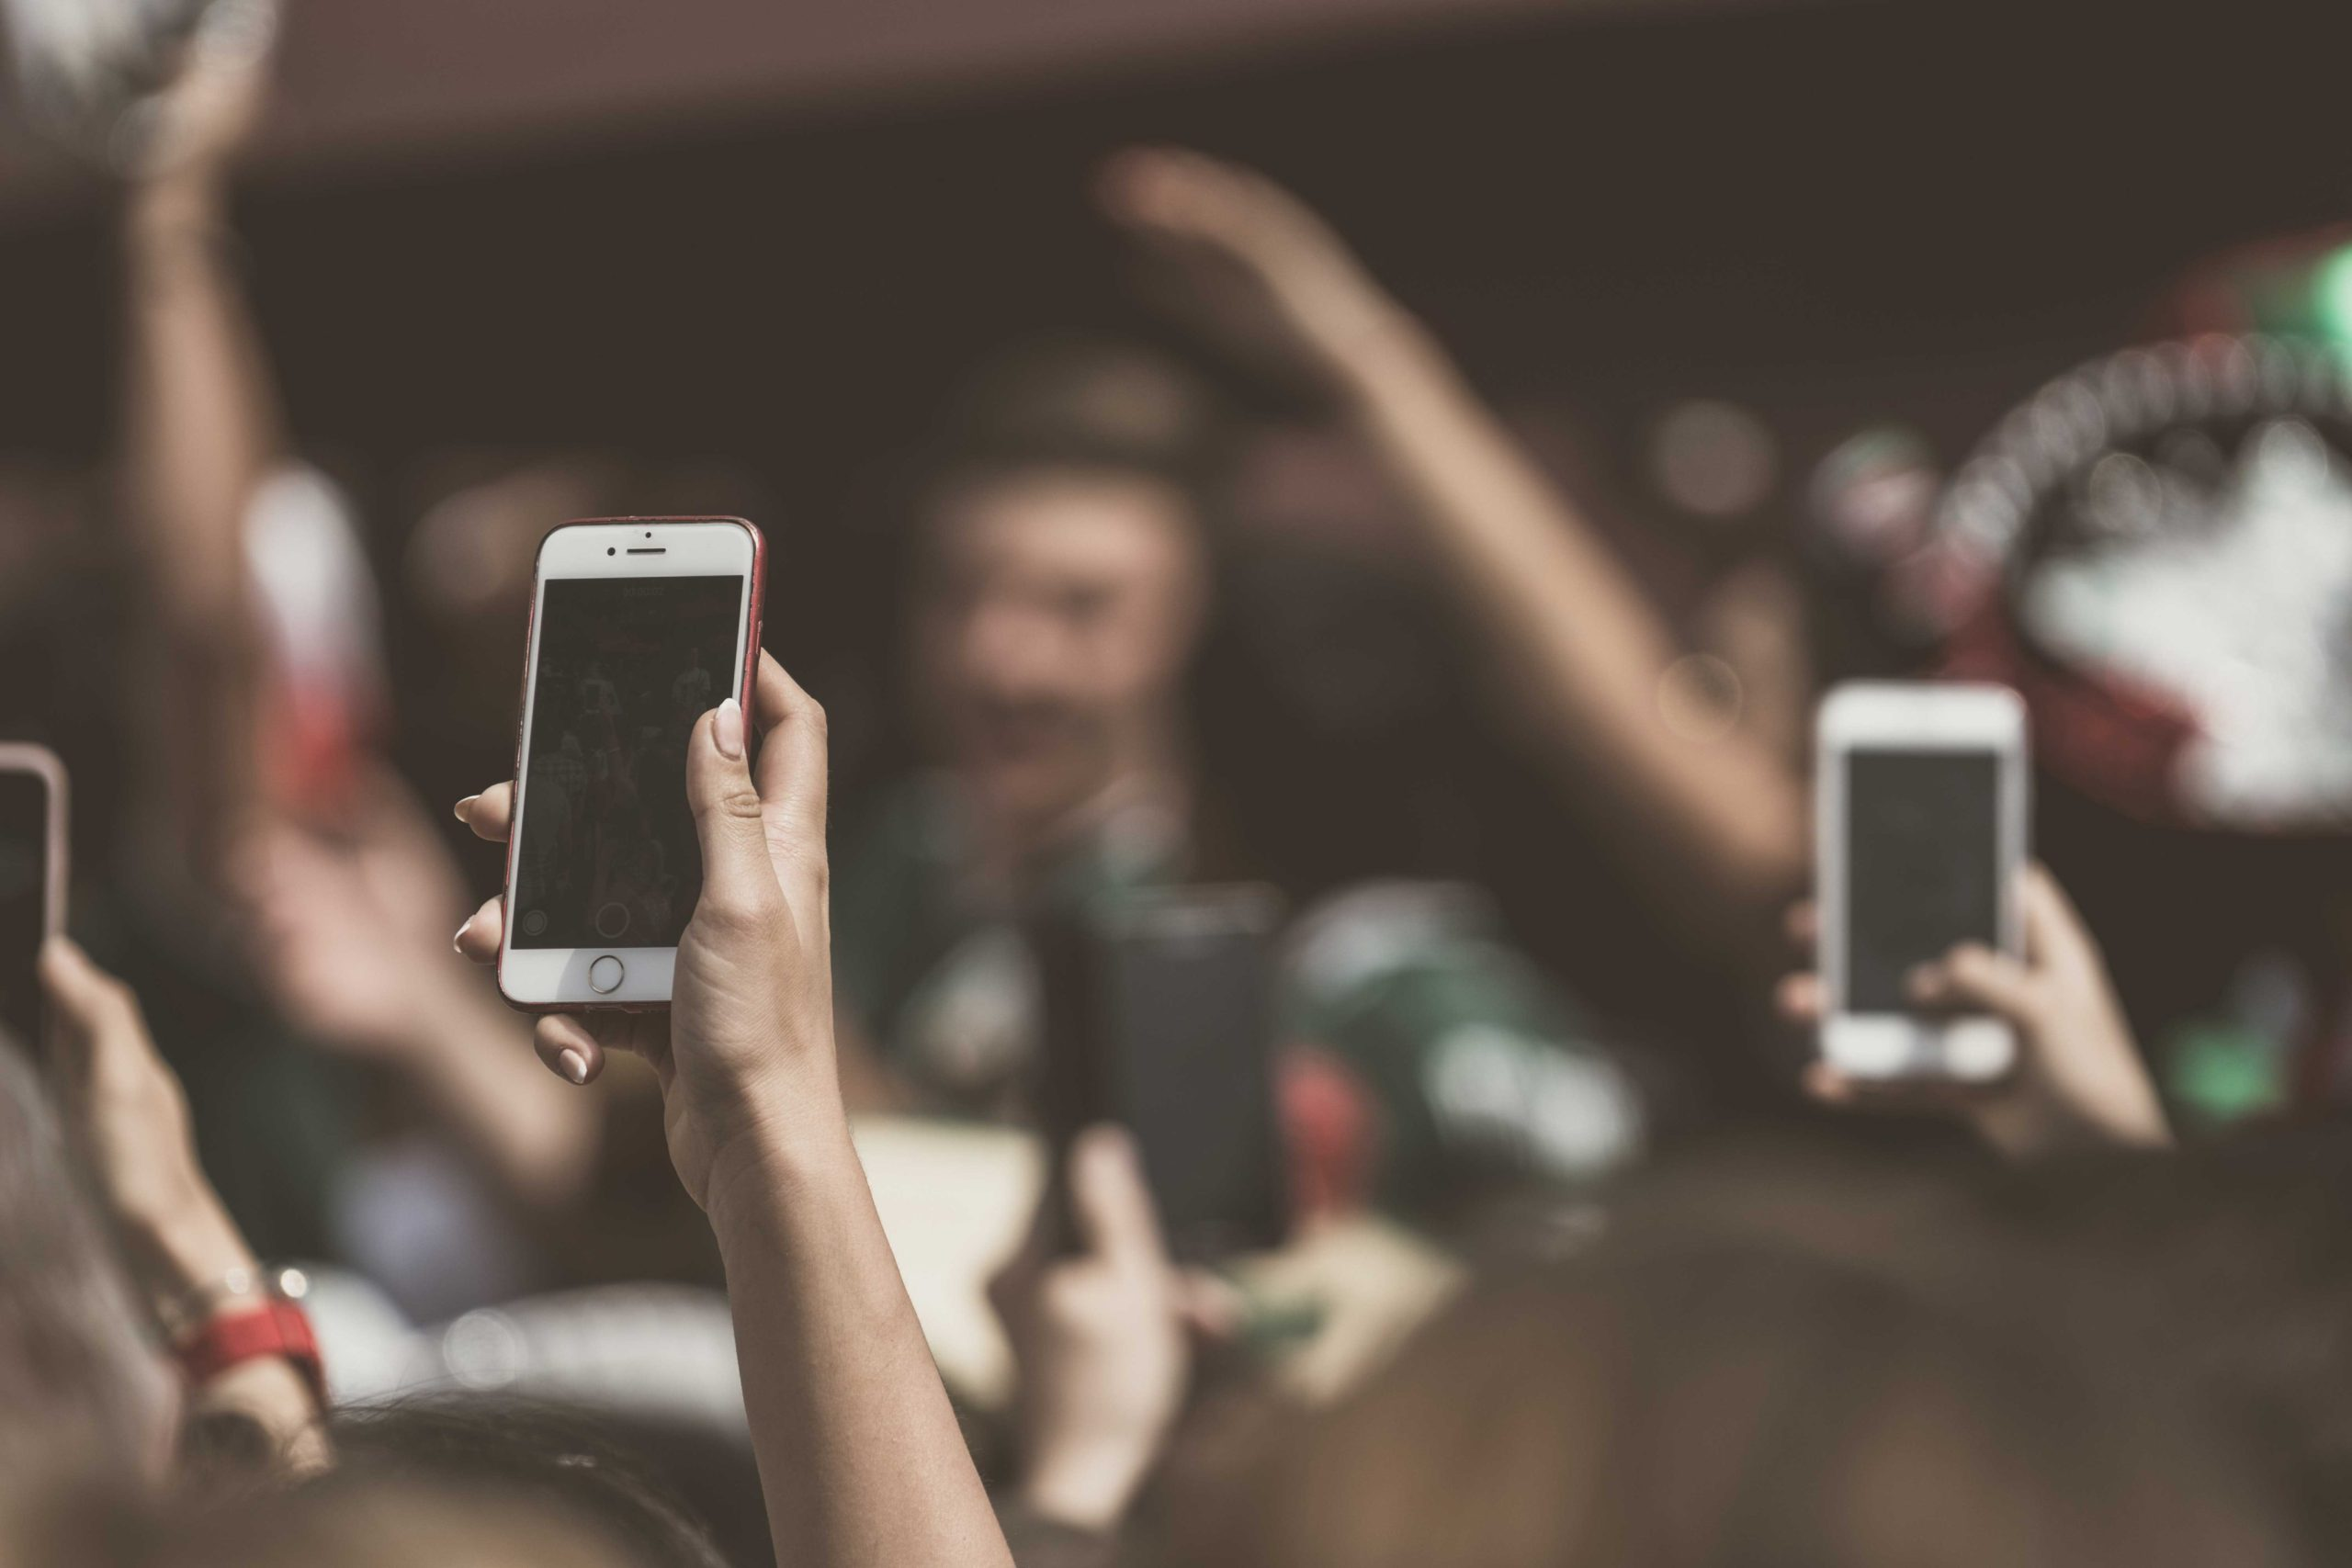

<br>
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one

<br> 
To reduce customer churn, telecom companies need to __predict which customers are at high risk of churn.__

<br>

Consider a telecom service provider has the dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months and hence to mitigate the issue of chrun by mapping the same to different customer behaviours during good and actions phases.

<br> 
Our aim is to build a model to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc. The model will also be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

<br>

--------------------------------------------------------------------------------

>>>Following Steps have been taken:
>>1. Reading and understanding the data
2. Data Cleaning
3. Filtering the high-value customers
4. Tagging churn and non-churn customers
5. Exploratory Data Analysis, Feature Engineering & Data Visualization
6. Data Preparation
7. Model building (I) With PCA
8. Model building (II) without PCA
9. Final Conclusion





## 1.Reading and Understanding the Data

### 1.1 Importing the required libraries

In [ ]:
#importing the required libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,roc_curve,precision_recall_curve,f1_score,precision_score,accuracy_score,auc
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#To handle the data imbalance
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#Settig the display options
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)  

### 1.2 Loading the Data

- Dataframe used dor this assignment: __df__

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### 1.3 Understanding the Data

In [ ]:
#Checking the shape of the dataframe
df.shape

(99999, 226)

In [ ]:
#Checking the summary of the dataframe
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [ ]:
#Checking the statistical summary of the dataframe
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## 2.Data Cleaning

### 2.1 Check for the Duplicate values
Here, we find that **`'mobile_number'`** acts as unique id in the dataframe, we will use it to check for the duplicate values in the dataset.

In [ ]:
#Check for the duplicate values
df.mobile_number.duplicated().any()

False

- From above results we conclude that there are no duplicate values in the dataframe.

### 2.2 Checking for the highly biased columns
We will make a list of highly biased columns. And simply drop them as they don't add any value to identify any pattern or churn and hence the model building.

In [ ]:
#we will store the column names which are biased to one values in the list
Unique_Val_col = []

for i in df.columns:
  if df[i].value_counts().shape[0]==1:
    Unique_Val_col.append(i)
    
print('Total number of columns having biased values: ',len(Unique_Val_col))
print(Unique_Val_col)


Total number of columns having biased values:  16
['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


We have such 16 columns.Let's drop them

In [ ]:
#Dropping the above columns
df.drop( Unique_Val_col , axis = 1, inplace = True )

### 2.3 Missing value check and Imputing 

In [ ]:
#Define a function to check the percentage of the missing values so we don't have to write the code all over again
def check_null(x):
  return round( 100*( df.isnull().sum() / len(df.index) ), 2 ).sort_values(ascending = False)

In [ ]:
#check the % of the missing values
check_null(df)

night_pck_user_6            74.85
arpu_2g_6                   74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
count_rech_2g_6             74.85
max_rech_data_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
night_pck_user_7            74.43
arpu_2g_7                   74.43
total_rech_data_7           74.43
arpu_3g_7                   74.43
max_rech_data_7             74.43
av_rech_amt_data_7          74.43
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
av_rech_amt_data_9          74.08
total_rech_data_9           74.08
arpu_3g_9                   74.08
count_rech_2g_9             74.08
night_pck_user

From the above, we observe that there is a specific pattern in the data as the columns/attributes of the same months are showing the same percentage of the missing values. Let's explore it one by one

In [ ]:
## Grouping the June month columns with same percentage of the values
june_cols = [ 'night_pck_user_6', 'arpu_2g_6', 'count_rech_3g_6' ,'av_rech_amt_data_6',         
'count_rech_2g_6' , 'max_rech_data_6' , 'fb_user_6' ,'date_of_last_rech_data_6',     
'total_rech_data_6','arpu_3g_6' ]
           

Let's check whether this null values have the same occurances of null values

In [ ]:
for i in june_cols:
  print( sum( df['night_pck_user_6'].isnull() != df[i].isnull() ))

0
0
0
0
0
0
0
0
0
0


From the above, we observed that nan occurs at the same instances for all the above grouped columns. We further observe that in the absence of data recharge (**`date_of_last_rech_data_6`**) done for that particular month, user is not using corresponding internet related services, which is understandable. Hence we should impute these **NAN** values with **0**.

In [ ]:
#Define a function to impute the missing values with zero
def impute_with_zero(x):
  if str(x) == 'nan':
    return 0
  else:
    return x

In [ ]:
#We will impute the missing values in the columns with june month with zero
for i in june_cols:
  df[i] = df[i].apply(impute_with_zero)

In [ ]:
##Again checking the % of null values
check_null(df)

max_rech_data_7             74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
count_rech_3g_7             74.43
fb_user_7                   74.43
arpu_2g_7                   74.43
total_rech_data_7           74.43
count_rech_2g_7             74.43
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
arpu_2g_9                   74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
max_rech_data_9             74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
av_rech_amt_data_9          74.08
night_pck_user_9            74.08
total_rech_data_8           73.66
max_rech_data_8             73.66
arpu_3g_8                   73.66
count_rech_2g_8             73.66
arpu_2g_8                   73.66
av_rech_amt_data_8          73.66
count_rech_3g_8             73.66
night_pck_user_8            73.66
date_of_last_rech_data_8    73.66
fb_user_8     

In [ ]:
## Grouping the July month columns with same percentage of the values
july_cols = [ 'max_rech_data_7', 'av_rech_amt_data_7', 'date_of_last_rech_data_7' ,
             'count_rech_3g_7','fb_user_7' , 'arpu_2g_7' , 'total_rech_data_7' ,
             'count_rech_2g_7','arpu_3g_7','night_pck_user_7' ]


Let's check whether this null values have the same occurances of null values

In [ ]:
for i in july_cols:
  print( sum( df['max_rech_data_7'].isnull() != df[i].isnull() ))

0
0
0
0
0
0
0
0
0
0


From the above, we observed that nan occurs at the same instances for all the above grouped columns. We further observe that in the absence of data recharge (**`date_of_last_rech_data_7`**) done for that particular month, user is not using corresponding internet related services, which is understandable. Hence we should impute these **NAN** values with **0**.

In [ ]:
#We will impute the missing values in the columns with june month with zero
for i in july_cols:
  df[i] = df[i].apply(impute_with_zero)

In [ ]:
##Again checking for the missing values
check_null(df)

date_of_last_rech_data_9    74.08
total_rech_data_9           74.08
count_rech_3g_9             74.08
arpu_3g_9                   74.08
count_rech_2g_9             74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
av_rech_amt_data_9          74.08
fb_user_9                   74.08
max_rech_data_8             73.66
night_pck_user_8            73.66
av_rech_amt_data_8          73.66
count_rech_3g_8             73.66
arpu_3g_8                   73.66
count_rech_2g_8             73.66
date_of_last_rech_data_8    73.66
arpu_2g_8                   73.66
total_rech_data_8           73.66
fb_user_8                   73.66
loc_og_t2c_mou_9            7.75 
loc_ic_t2t_mou_9            7.75 
loc_ic_t2m_mou_9            7.75 
loc_ic_t2f_mou_9            7.75 
loc_og_mou_9                7.75 
std_ic_t2m_mou_9            7.75 
loc_ic_mou_9                7.75 
std_ic_t2f_mou_9            7.75 
std_ic_t2t_mou_9            7.75 
std_og_t2t_mou

In [ ]:
## Grouping the September month columns with same percentage of the values
sept_cols = [ 'date_of_last_rech_data_9', 'total_rech_data_9', 'count_rech_3g_9' ,
             'arpu_3g_9','count_rech_2g_9' , 'arpu_2g_9' , 'max_rech_data_9' ,
             'night_pck_user_9','av_rech_amt_data_9','fb_user_9' ]


Let's check whether this null values have the same occurances of null values

In [ ]:
for i in sept_cols:
  print( sum( df['date_of_last_rech_data_9'].isnull() != df[i].isnull() ))

0
0
0
0
0
0
0
0
0
0


From the above, we observed that nan occurs at the same instances for all the above grouped columns. We further observe that in the absence of data recharge (**`date_of_last_rech_data_9`**) done for that particular month, user is not using corresponding internet related services, which is understandable. Hence we should impute these **NAN** values with **0**.

In [ ]:
#We will impute the missing values in the columns with june month with zero
for i in sept_cols:
  df[i] = df[i].apply(impute_with_zero)

In [ ]:
##Again checking for the missing values
check_null(df)

arpu_2g_8                   73.66
date_of_last_rech_data_8    73.66
arpu_3g_8                   73.66
night_pck_user_8            73.66
fb_user_8                   73.66
av_rech_amt_data_8          73.66
count_rech_3g_8             73.66
count_rech_2g_8             73.66
max_rech_data_8             73.66
total_rech_data_8           73.66
loc_og_t2f_mou_9            7.75 
loc_og_t2c_mou_9            7.75 
loc_og_mou_9                7.75 
std_og_t2t_mou_9            7.75 
std_og_t2m_mou_9            7.75 
std_og_t2f_mou_9            7.75 
std_ic_mou_9                7.75 
loc_og_t2m_mou_9            7.75 
isd_og_mou_9                7.75 
spl_og_mou_9                7.75 
og_others_9                 7.75 
ic_others_9                 7.75 
isd_ic_mou_9                7.75 
spl_ic_mou_9                7.75 
loc_ic_t2t_mou_9            7.75 
std_ic_t2f_mou_9            7.75 
std_ic_t2m_mou_9            7.75 
std_ic_t2t_mou_9            7.75 
loc_ic_mou_9                7.75 
loc_ic_t2f_mou

In [ ]:
## Grouping the July month columns with same percentage of the values
aug_cols = [ 'arpu_2g_8', 'date_of_last_rech_data_8', 'arpu_3g_8' ,
             'night_pck_user_8','fb_user_8' , 'av_rech_amt_data_8' , 
            'count_rech_3g_8' ,'count_rech_2g_8','max_rech_data_8',
            'total_rech_data_8' ]


Let's check whether this null values have the same occurances of null values

In [ ]:
for i in aug_cols:
  print( sum( df['date_of_last_rech_data_8'].isnull() != df[i].isnull() ))

0
0
0
0
0
0
0
0
0
0


From the above, we observed that nan occurs at the same instances for all the above grouped columns. We further observe that in the absence of data recharge (**`date_of_last_rech_data_8`**) done for that particular month, user is not using corresponding internet related services, which is understandable. Hence we should impute these **NAN** values with **0**.

In [ ]:
#We will impute the missing values in the columns with june month with zero
for i in aug_cols:
  df[i] = df[i].apply(impute_with_zero)

In [ ]:
##Again checking for the missing values
check_null(df)

std_ic_mou_9                7.75
spl_og_mou_9                7.75
roam_og_mou_9               7.75
loc_ic_t2m_mou_9            7.75
loc_og_t2t_mou_9            7.75
loc_ic_t2t_mou_9            7.75
og_others_9                 7.75
loc_og_t2m_mou_9            7.75
loc_og_t2f_mou_9            7.75
isd_ic_mou_9                7.75
isd_og_mou_9                7.75
std_og_mou_9                7.75
loc_og_t2c_mou_9            7.75
std_og_t2f_mou_9            7.75
std_og_t2m_mou_9            7.75
loc_og_mou_9                7.75
ic_others_9                 7.75
std_og_t2t_mou_9            7.75
roam_ic_mou_9               7.75
offnet_mou_9                7.75
std_ic_t2t_mou_9            7.75
std_ic_t2m_mou_9            7.75
std_ic_t2f_mou_9            7.75
loc_ic_mou_9                7.75
loc_ic_t2f_mou_9            7.75
onnet_mou_9                 7.75
spl_ic_mou_9                7.75
loc_ic_t2m_mou_8            5.38
loc_ic_t2t_mou_8            5.38
std_og_t2m_mou_8            5.38
std_ic_t2t

Again, here we notice that there are 7.75% NaN values for September month. Except **`'date_of_last_rech_9'`** have 4.76% of Nan Values which means that recharge haven't been done for September month for these cases. <br>
Let's do further analysis. 

We can impute the values of **`'date_of_last_rech_9'`** column with 0 as it represents the absence of service recharge. <br>
If a customer haven't recharged for a particular month and hence not using the services for that month. So we need to convert correspondingthose NaN values with 0.

Let's group all the columns with september month.

In [ ]:
df['date_of_last_rech_9'] = df['date_of_last_rech_9'].apply(impute_with_zero)

It is understood that if a customer has not recharged (for voice services) for a certain month and hence is not using services for that particular month. So, we need to convert corresponding those NAN values with 0.

Let's gather all the September columns with missing values.

In [ ]:
temp_list = [  
                'std_ic_mou_9',
                'spl_og_mou_9',
                'roam_og_mou_9',
                'loc_ic_t2m_mou_9',
                'loc_og_t2t_mou_9',
                'loc_ic_t2t_mou_9',
                'og_others_9',
                'loc_og_t2m_mou_9',
                'loc_og_t2f_mou_9',
                'isd_ic_mou_9',
                'isd_og_mou_9',
                'std_og_mou_9',
                'loc_og_t2c_mou_9',
                'std_og_t2f_mou_9',
                'std_og_t2m_mou_9',
                'loc_og_mou_9',
                'ic_others_9',
                'std_og_t2t_mou_9',
                'roam_ic_mou_9',
                'offnet_mou_9',
                'std_ic_t2t_mou_9',
                'std_ic_t2m_mou_9',
                'std_ic_t2f_mou_9',
                'loc_ic_mou_9',
                'loc_ic_t2f_mou_9',
                'onnet_mou_9',
                'spl_ic_mou_9' ]

In [ ]:
#convert those NAN values in temp_list to 0, where the corresponding recharges (date_of_last_rech_9) have not been done.

ref = df['date_of_last_rech_9'].values

for col in temp_list:
    temp = df[col].values
    for i,j in enumerate(temp):
        if ref[i]==0 and str(temp[i])=='nan':
            temp[i]=0
    df[col]=temp

In [ ]:
#check again for the missing values
check_null(df)

std_ic_t2t_mou_8            5.38
spl_og_mou_8                5.38
og_others_8                 5.38
loc_og_t2m_mou_8            5.38
loc_ic_t2t_mou_8            5.38
isd_og_mou_8                5.38
loc_og_t2t_mou_8            5.38
loc_ic_t2m_mou_8            5.38
std_og_t2t_mou_8            5.38
loc_ic_t2f_mou_8            5.38
roam_og_mou_8               5.38
loc_og_t2c_mou_8            5.38
ic_others_8                 5.38
roam_ic_mou_8               5.38
std_og_mou_8                5.38
isd_ic_mou_8                5.38
offnet_mou_8                5.38
spl_ic_mou_8                5.38
loc_ic_mou_8                5.38
std_og_t2f_mou_8            5.38
onnet_mou_8                 5.38
std_ic_mou_8                5.38
loc_og_mou_8                5.38
std_ic_t2f_mou_8            5.38
std_ic_t2m_mou_8            5.38
std_og_t2m_mou_8            5.38
loc_og_t2f_mou_8            5.38
std_og_t2f_mou_9            4.86
std_og_mou_9                4.86
std_og_t2m_mou_9            4.86
isd_og_mou

Still we are left with 4.86% of the data which are 'nan', in the columns of September month. That means customers have recharged but have not used the services during that particular month. The same may be special group of customers with high churn. So instead of dropping them let's just impute them with zero. 

In [ ]:
for col in temp_list:
    df[col]=df[col].apply(impute_with_zero)

In [ ]:
#check again for missing values
check_null(df)

std_og_t2m_mou_8            5.38
roam_ic_mou_8               5.38
og_others_8                 5.38
loc_og_t2f_mou_8            5.38
loc_og_mou_8                5.38
loc_og_t2m_mou_8            5.38
ic_others_8                 5.38
loc_ic_t2f_mou_8            5.38
std_ic_t2t_mou_8            5.38
loc_og_t2t_mou_8            5.38
std_og_t2t_mou_8            5.38
roam_og_mou_8               5.38
loc_ic_t2t_mou_8            5.38
loc_og_t2c_mou_8            5.38
std_ic_mou_8                5.38
isd_ic_mou_8                5.38
spl_ic_mou_8                5.38
spl_og_mou_8                5.38
isd_og_mou_8                5.38
std_ic_t2f_mou_8            5.38
std_ic_t2m_mou_8            5.38
std_og_mou_8                5.38
onnet_mou_8                 5.38
loc_ic_t2m_mou_8            5.38
loc_ic_mou_8                5.38
offnet_mou_8                5.38
std_og_t2f_mou_8            5.38
std_og_mou_6                3.94
std_og_t2m_mou_6            3.94
std_og_t2f_mou_6            3.94
og_others_

Simliarly let's check the same for the month of August.

In [ ]:
df.date_of_last_rech_8.isnull().sum()

3622

From above, we notice that there are certain customers who have not done  recharge for the month of August. Let's replace the corresponding NAN values with 0.

In [ ]:
df.date_of_last_rech_8 = df.date_of_last_rech_8.apply(impute_with_zero)

Gathering the columns of August with NAN values.

In [ ]:
aug_cols_2 = [ 'std_og_mou_8',
                'roam_ic_mou_8',
                'loc_og_t2f_mou_8',
                'loc_og_t2m_mou_8',
                'og_others_8',
                'isd_og_mou_8',
                'loc_ic_t2t_mou_8',
                'loc_og_t2t_mou_8',
                'loc_ic_t2m_mou_8',
                'std_og_t2t_mou_8',
                'roam_og_mou_8',
                'loc_ic_t2f_mou_8',
                'std_ic_t2m_mou_8',
                'ic_others_8',
                'loc_og_t2c_mou_8',
                'loc_ic_mou_8',
                'isd_ic_mou_8',
                'offnet_mou_8',
                'spl_ic_mou_8',
                'std_og_t2f_mou_8',
                'onnet_mou_8',
                'std_ic_t2t_mou_8',
                'loc_og_mou_8',
                'std_ic_mou_8',
                'std_og_t2m_mou_8',
                'std_ic_t2f_mou_8',
                'spl_og_mou_8'        ]
              


In [ ]:
#convert those NAN values in aug_cols_2 to 0, where the corresponding recharges (date_of_last_rech_8) have not been done.

ref = df['date_of_last_rech_8'].values

for col in aug_cols_2:
    piv = df[col].values
    for i,j in enumerate(piv):
        if ref[i]==0 and str(piv[i])=='nan':
            piv[i]=0
    df[col]=piv

In [ ]:
#check for missing values
check_null(df)

std_ic_t2f_mou_6            3.94
loc_ic_t2m_mou_6            3.94
std_og_t2m_mou_6            3.94
loc_og_t2m_mou_6            3.94
isd_ic_mou_6                3.94
std_og_t2t_mou_6            3.94
loc_ic_t2f_mou_6            3.94
loc_og_t2t_mou_6            3.94
std_og_t2f_mou_6            3.94
spl_ic_mou_6                3.94
loc_og_mou_6                3.94
roam_og_mou_6               3.94
std_ic_t2t_mou_6            3.94
og_others_6                 3.94
roam_ic_mou_6               3.94
std_og_mou_6                3.94
std_ic_t2m_mou_6            3.94
ic_others_6                 3.94
offnet_mou_6                3.94
loc_og_t2c_mou_6            3.94
isd_og_mou_6                3.94
loc_ic_mou_6                3.94
onnet_mou_6                 3.94
std_ic_mou_6                3.94
loc_ic_t2t_mou_6            3.94
spl_og_mou_6                3.94
loc_og_t2f_mou_6            3.94
std_og_t2t_mou_7            3.86
loc_ic_mou_7                3.86
std_og_t2f_mou_7            3.86
loc_ic_t2f

Still we are left with 3.40% of the data which are 'nan', in the columns of August month. That means customers have recharged but have not used the services during that particular month. The same may be special group of customers with high churn. So instaed of dropping these values let's just impute these values with zero.

In [ ]:
for col in aug_cols_2:
    df[col] = df[col].apply(impute_with_zero)

In [ ]:
#check for missing values
check_null(df)

std_og_t2t_mou_6            3.94
og_others_6                 3.94
loc_ic_t2t_mou_6            3.94
spl_og_mou_6                3.94
loc_og_t2m_mou_6            3.94
loc_ic_t2m_mou_6            3.94
loc_og_t2c_mou_6            3.94
loc_ic_t2f_mou_6            3.94
loc_og_t2t_mou_6            3.94
std_og_t2m_mou_6            3.94
loc_ic_mou_6                3.94
roam_og_mou_6               3.94
isd_og_mou_6                3.94
ic_others_6                 3.94
std_ic_t2t_mou_6            3.94
roam_ic_mou_6               3.94
std_og_mou_6                3.94
isd_ic_mou_6                3.94
loc_og_mou_6                3.94
offnet_mou_6                3.94
spl_ic_mou_6                3.94
std_ic_t2m_mou_6            3.94
onnet_mou_6                 3.94
std_og_t2f_mou_6            3.94
std_ic_t2f_mou_6            3.94
std_ic_mou_6                3.94
loc_og_t2f_mou_6            3.94
isd_og_mou_7                3.86
std_og_t2f_mou_7            3.86
std_og_t2m_mou_7            3.86
spl_og_mou

From above, we notice that there are certain customers who have not done voice service recharge for the month of June. Let's replace the corresponding NAN values with 0.          

In [ ]:
df['date_of_last_rech_6'] = df['date_of_last_rech_6'].apply(impute_with_zero)

Gathering columns of June month with missing values.

In [ ]:
june_cols_2 = ['std_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'ic_others_6',
 'std_ic_t2t_mou_6',
 'isd_ic_mou_6',
 'spl_ic_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'loc_og_t2m_mou_6',
 'std_ic_mou_6',
 'onnet_mou_6',
 'offnet_mou_6',
 'roam_og_mou_6',
 'roam_ic_mou_6']

In [ ]:
#convert those NAN values in june_cols_2 to 0, where the corresponding recharges (date_of_last_rech_6) have not been done.


ref = df['date_of_last_rech_6'].values

for col in june_cols_2:
    piv = df[col].values
    for i,j in enumerate(piv):
        if ref[i]==0 and str(piv[i])=='nan':
            piv[i]=0
    df[col]=piv

In [ ]:
check_null(df)

loc_ic_t2f_mou_7            3.86
std_og_mou_7                3.86
spl_og_mou_7                3.86
loc_og_t2m_mou_7            3.86
loc_ic_t2t_mou_7            3.86
loc_ic_t2m_mou_7            3.86
loc_og_t2t_mou_7            3.86
isd_og_mou_7                3.86
std_og_t2t_mou_7            3.86
loc_og_t2c_mou_7            3.86
roam_og_mou_7               3.86
loc_ic_mou_7                3.86
ic_others_7                 3.86
loc_og_t2f_mou_7            3.86
roam_ic_mou_7               3.86
std_ic_t2t_mou_7            3.86
isd_ic_mou_7                3.86
offnet_mou_7                3.86
std_og_t2f_mou_7            3.86
spl_ic_mou_7                3.86
loc_og_mou_7                3.86
onnet_mou_7                 3.86
std_ic_t2m_mou_7            3.86
std_og_t2m_mou_7            3.86
std_ic_t2f_mou_7            3.86
std_ic_mou_7                3.86
og_others_7                 3.86
isd_og_mou_6                3.16
std_og_t2f_mou_6            3.16
spl_og_mou_6                3.16
std_og_mou

We are still left with 3.16% of the data which are 'nan', in the columns of June month. That means customers have recharged but have not used the services during that particular month. The same may be special group of customers with high churn. So let's not drop them and instead impute their NAN values with zero, as of now.

In [ ]:
for col in june_cols_2:
    df[col] = df[col].apply(impute_with_zero)

In [ ]:
#check for missing values
check_null(df)

roam_og_mou_7               3.86
og_others_7                 3.86
loc_og_t2c_mou_7            3.86
loc_ic_t2m_mou_7            3.86
std_og_t2t_mou_7            3.86
loc_og_t2f_mou_7            3.86
loc_ic_t2f_mou_7            3.86
loc_og_t2m_mou_7            3.86
std_og_t2m_mou_7            3.86
loc_ic_mou_7                3.86
loc_og_t2t_mou_7            3.86
ic_others_7                 3.86
loc_og_mou_7                3.86
std_og_t2f_mou_7            3.86
std_ic_t2t_mou_7            3.86
loc_ic_t2t_mou_7            3.86
roam_ic_mou_7               3.86
spl_ic_mou_7                3.86
isd_og_mou_7                3.86
spl_og_mou_7                3.86
std_ic_t2f_mou_7            3.86
isd_ic_mou_7                3.86
std_og_mou_7                3.86
onnet_mou_7                 3.86
std_ic_t2m_mou_7            3.86
offnet_mou_7                3.86
std_ic_mou_7                3.86
date_of_last_rech_7         1.77
total_og_mou_6              0.00
og_others_9                 0.00
og_others_

From above, we notice that there are certain customers who have not done voice service recharge for the month of July. Let's replace the corresponding NAN values with 0.

In [ ]:
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].apply(impute_with_zero)

Gathering columns of July month with missing values.

In [ ]:
july_cols_2 = ['roam_og_mou_7',
 'og_others_7',
 'loc_og_t2c_mou_7',
 'loc_ic_t2m_mou_7',
 'std_og_t2t_mou_7',
 'loc_og_t2f_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_og_t2m_mou_7',
 'std_og_t2m_mou_7',
 'loc_ic_mou_7',
 'loc_og_t2t_mou_7',
 'ic_others_7',
 'loc_og_mou_7',
 'std_og_t2f_mou_7',
 'std_ic_t2t_mou_7',
 'loc_ic_t2t_mou_7',
 'roam_ic_mou_7',
 'spl_ic_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'std_ic_t2f_mou_7',
 'isd_ic_mou_7',
 'std_og_mou_7',
 'onnet_mou_7',
 'std_ic_t2m_mou_7',
 'offnet_mou_7',
 'std_ic_mou_7']

In [ ]:
#convert those NAN values in cols_july_2 to 0, where the corresponding recharges (date_of_last_rech_7) have not been done.


ref = df['date_of_last_rech_7'].values

for col in july_cols_2:
    piv = df[col].values
    for i,j in enumerate(piv):
        if ref[i]==0 and str(piv[i])=='nan':
            piv[i]=0
    df[col]=piv

In [ ]:
check_null(df)

isd_og_mou_7                2.91
std_og_t2f_mou_7            2.91
loc_og_t2c_mou_7            2.91
loc_ic_t2m_mou_7            2.91
std_og_t2t_mou_7            2.91
loc_og_t2f_mou_7            2.91
loc_ic_t2f_mou_7            2.91
loc_og_t2m_mou_7            2.91
std_og_t2m_mou_7            2.91
loc_ic_mou_7                2.91
loc_og_t2t_mou_7            2.91
og_others_7                 2.91
loc_og_mou_7                2.91
ic_others_7                 2.91
std_ic_t2t_mou_7            2.91
roam_og_mou_7               2.91
roam_ic_mou_7               2.91
std_ic_t2m_mou_7            2.91
spl_og_mou_7                2.91
std_ic_t2f_mou_7            2.91
std_og_mou_7                2.91
spl_ic_mou_7                2.91
onnet_mou_7                 2.91
offnet_mou_7                2.91
std_ic_mou_7                2.91
isd_ic_mou_7                2.91
loc_ic_t2t_mou_7            2.91
og_others_9                 0.00
spl_og_mou_9                0.00
og_others_8                 0.00
total_og_m

We are still left with 2.91% of the data which are 'nan', in the columns of July month. That means customers have recharged but have not used the services during that particular month. The same may be special group of customers with high churn. So let's not drop them and instead impute their NAN values with zero, as of now.

In [ ]:
for col in july_cols_2:
    df[col] = df[col].apply(impute_with_zero)

In [ ]:
#check for missing values
check_null(df)

sep_vbc_3g                  0.0
std_og_t2f_mou_9            0.0
loc_ic_t2t_mou_9            0.0
loc_ic_t2t_mou_8            0.0
loc_ic_t2t_mou_7            0.0
loc_ic_t2t_mou_6            0.0
total_og_mou_9              0.0
total_og_mou_8              0.0
total_og_mou_7              0.0
total_og_mou_6              0.0
og_others_9                 0.0
og_others_8                 0.0
og_others_7                 0.0
og_others_6                 0.0
spl_og_mou_9                0.0
spl_og_mou_8                0.0
spl_og_mou_7                0.0
spl_og_mou_6                0.0
isd_og_mou_9                0.0
isd_og_mou_8                0.0
isd_og_mou_7                0.0
isd_og_mou_6                0.0
std_og_mou_9                0.0
std_og_mou_8                0.0
std_og_mou_7                0.0
loc_ic_t2m_mou_6            0.0
loc_ic_t2m_mou_7            0.0
loc_ic_t2m_mou_8            0.0
std_ic_t2t_mou_9            0.0
std_ic_mou_7                0.0
std_ic_mou_6                0.0
std_ic_t

Hence we have treated all the missing values in the dataset. From our above exercise, we noticed that, 
- there are cetain customers who have not recharged (voice and/or data) and hence not used the corresponding services for that particular months. 
- there are some customers who have recharged (voice and/or data), but stopped using services. Those may be the cohort of customers who may have relatively high churn rates. We would explore this further in EDA.

## 3.Filtering the high-value customers

Now that we have cleaned out dataset, its time to filter the high value customers, which is the cohort of focus for this case study. As per the given definition of *high-value customers*, we have to filter those customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

We have average recharge amount for data (`av_rech_amt_data_6`) and the total no. of recharges for data (`total_rech_data_6`) for all the cursomers. Thus we can multiply both to get the **data recharge** done by each customers for that particular months.

In [ ]:
# Data recharge done by each customer for the june month
df.data_recharge_6 = df.total_rech_data_6 * df.av_rech_amt_data_6

# Data recharge done by each customer for the july month
df.data_recharge_7 = df.total_rech_data_7 * df.av_rech_amt_data_7

# Data recharge done by each customer for the august month
df.data_recharge_8 = df.total_rech_data_8 * df.av_rech_amt_data_8

Now let's get the tota average recharge (voice + data) done by customers for the June and July months.

In [ ]:
df['total_avg_rech_amt_good_phase'] = (df.total_rech_amt_6 + df.total_rech_amt_7 +
                                       df.data_recharge_6 + df.data_recharge_7)/2

dataframe used:
- High Value Customers = df_hvc

In [ ]:
#filtering in the high value customers by 0.7 percentile and hence getting filtered dataset
df_hvc = df[df.total_avg_rech_amt_good_phase >= df.total_avg_rech_amt_good_phase.quantile(0.7)]

In [ ]:
#check the shape of data now
df_hvc.shape

(30001, 211)

Since we have already make use of `total_avg_rech_amt_good_phase`, we can drop it.

In [ ]:
df_hvc.drop(['total_avg_rech_amt_good_phase'], axis=1, inplace=True)

## 4.Tagging churn and non-churn customers

As per the given definition, those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase i.e during September month, are churners. For the same, we have to look after `total_ic_mou_9`, `total_og_mou_9`, `vol_2g_mb_9` & `vol_3g_mb_9` columns.

In [ ]:
#function to tag churn/non-churn
def is_churn(x):
    if x==0:
        return 1  #1 for churn
    else:
        return 0   #0 for non-churn 

df_hvc['churn'] = df_hvc.total_ic_mou_9 + df_hvc.total_og_mou_9 + df_hvc.vol_2g_mb_9 + df_hvc.vol_3g_mb_9

df_hvc.churn = df_hvc.churn.apply(is_churn)

In [ ]:
#checking the distribution of churn and non-churn
df_hvc.churn.value_counts(normalize=True)*100


0    91.863605
1    8.136395 
Name: churn, dtype: float64

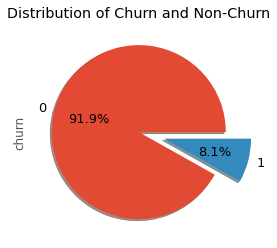

In [ ]:
##Checking Data imbalace visually

df_hvc.churn.value_counts().plot.pie(shadow=True, explode=(0, 0.3), startangle=0, autopct='%1.1f%%', fontsize=13)
plt.title('Distribution of Churn and Non-Churn')
plt.show()

**Insights:**
- From the above, we note that among the high value customers, there are approximately 92% non-churners while 8% churners.

Since we have already tagged churners, we have to remove all the attributes corresponding to the churn phase i.e. September month as the same would not be available to us while predicting the churn with our model.

In [ ]:
#identifying the columns related to sepetember month
sept_cols = []

for i in df_hvc.columns:
    if i[-2:]=='_9':
        sept_cols.append(i)

for i in sept_cols:
    print(i)

arpu_9
onnet_mou_9
offnet_mou_9
roam_ic_mou_9
roam_og_mou_9
loc_og_t2t_mou_9
loc_og_t2m_mou_9
loc_og_t2f_mou_9
loc_og_t2c_mou_9
loc_og_mou_9
std_og_t2t_mou_9
std_og_t2m_mou_9
std_og_t2f_mou_9
std_og_mou_9
isd_og_mou_9
spl_og_mou_9
og_others_9
total_og_mou_9
loc_ic_t2t_mou_9
loc_ic_t2m_mou_9
loc_ic_t2f_mou_9
loc_ic_mou_9
std_ic_t2t_mou_9
std_ic_t2m_mou_9
std_ic_t2f_mou_9
std_ic_mou_9
total_ic_mou_9
spl_ic_mou_9
isd_ic_mou_9
ic_others_9
total_rech_num_9
total_rech_amt_9
max_rech_amt_9
date_of_last_rech_9
last_day_rch_amt_9
date_of_last_rech_data_9
total_rech_data_9
max_rech_data_9
count_rech_2g_9
count_rech_3g_9
av_rech_amt_data_9
vol_2g_mb_9
vol_3g_mb_9
arpu_3g_9
arpu_2g_9
night_pck_user_9
monthly_2g_9
sachet_2g_9
monthly_3g_9
sachet_3g_9
fb_user_9


In [ ]:
#appending left out Sept month column
sept_cols.append('sep_vbc_3g')

In [ ]:
#dropping the Sep month columns
df_hvc.drop(sept_cols, axis=1, inplace=True)

In [ ]:
#check shape of dataframe
df_hvc.shape

(30001, 159)

## 5.Exploratory Data Analysis, Feature Engineering & Data Visualization 

In [ ]:
#check the datatype of all the columns of df_hvc
df_hvc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 159 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   arpu_6                    float64
 2   arpu_7                    float64
 3   arpu_8                    float64
 4   onnet_mou_6               float64
 5   onnet_mou_7               float64
 6   onnet_mou_8               float64
 7   offnet_mou_6              float64
 8   offnet_mou_7              float64
 9   offnet_mou_8              float64
 10  roam_ic_mou_6             float64
 11  roam_ic_mou_7             float64
 12  roam_ic_mou_8             float64
 13  roam_og_mou_6             float64
 14  roam_og_mou_7             float64
 15  roam_og_mou_8             float64
 16  loc_og_t2t_mou_6          float64
 17  loc_og_t2t_mou_7          float64
 18  loc_og_t2t_mou_8          float64
 19  loc_og_t2m_mou_6          float64
 20  loc_og_t2m_mou_7          f

From the above, we notice that there are float, int and object type columns in our dataset. Let's bunch them by continuous and categorical types, for our further analysis. 

We noticed that columns **`'fb_user_6'`**, **`'fb_user_7'`**, **`'fb_user_8'`**, **`'night_pck_user_6'`**, **`'night_pck_user_7'`**, **`'night_pck_user_8'`** have been marked as float64 but are of categorical type. So let's deal with them accordingly.




Variables used:
- num_col = Numerical columns
- cat_col = Categorical columns

In [ ]:
#continuous variables
num_col = df_hvc.select_dtypes(['int64','float64']).columns 

'''columns 'fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8' have 
been marked as float64 but are of categorical type.so we will not consider them in num_col '''
num_col = list( set(num_col) - set(['fb_user_6', 'fb_user_7', 'fb_user_8', 
                                      'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']) )

#categorical variables
cat_col = set(df_hvc.select_dtypes(['object']).columns)  
cat_col.add('fb_user_6')
cat_col.add('fb_user_7')
cat_col.add('fb_user_8')
cat_col.add('night_pck_user_6')
cat_col.add('night_pck_user_7')
cat_col.add('night_pck_user_8')
cat_col = list(cat_col)


In [ ]:
print('num_col:', num_col)

num_col: ['loc_ic_t2f_mou_6', 'offnet_mou_7', 'av_rech_amt_data_8', 'vol_2g_mb_7', 'arpu_8', 'max_rech_amt_7', 'sachet_2g_7', 'roam_ic_mou_8', 'loc_og_mou_6', 'loc_og_t2m_mou_8', 'std_og_t2f_mou_6', 'loc_ic_t2m_mou_7', 'total_rech_num_6', 'count_rech_3g_7', 'std_og_t2m_mou_7', 'loc_og_t2c_mou_8', 'isd_og_mou_6', 'max_rech_data_8', 'isd_ic_mou_6', 'loc_ic_t2t_mou_8', 'aon', 'std_ic_t2t_mou_7', 'spl_ic_mou_7', 'roam_og_mou_7', 'monthly_2g_7', 'loc_ic_mou_8', 'ic_others_6', 'loc_og_t2m_mou_7', 'loc_og_t2t_mou_6', 'std_ic_mou_6', 'arpu_2g_8', 'ic_others_7', 'roam_ic_mou_7', 'loc_ic_mou_6', 'total_ic_mou_7', 'monthly_2g_6', 'onnet_mou_7', 'loc_og_t2t_mou_8', 'aug_vbc_3g', 'std_og_t2t_mou_6', 'jul_vbc_3g', 'total_ic_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2m_mou_6', 'loc_og_mou_7', 'total_rech_data_6', 'arpu_3g_8', 'loc_og_t2f_mou_7', 'std_ic_t2f_mou_8', 'onnet_mou_8', 'total_rech_num_8', 'arpu_3g_7', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'arpu_2g_7', 'std_og_t2m_mou_6', 'last_day_rch_amt_8', 'co

In [ ]:
print('cat_col:', cat_col)

cat_col: ['date_of_last_rech_8', 'date_of_last_rech_6', 'night_pck_user_6', 'fb_user_8', 'date_of_last_rech_data_6', 'date_of_last_rech_7', 'fb_user_7', 'fb_user_6', 'date_of_last_rech_data_7', 'night_pck_user_7', 'date_of_last_rech_data_8', 'night_pck_user_8']


### 5.1 Categorical data

Let's check the categorical columns.

In [ ]:
df_hvc[cat_col].head()

,date_of_last_rech_8,date_of_last_rech_6,night_pck_user_6,fb_user_8,date_of_last_rech_data_6,date_of_last_rech_7,fb_user_7,fb_user_6,date_of_last_rech_data_7,night_pck_user_7,date_of_last_rech_data_8,night_pck_user_8
0,8/8/2014,6/21/2014,0.0,1.0,6/21/2014,7/16/2014,1.0,1.0,7/16/2014,0.0,8/8/2014,0.0
7,8/26/2014,6/27/2014,0.0,0.0,0,7/25/2014,0.0,0.0,0,0.0,0,0.0
8,8/30/2014,6/25/2014,0.0,1.0,0,7/31/2014,1.0,0.0,7/31/2014,0.0,8/23/2014,0.0
21,8/31/2014,6/30/2014,0.0,0.0,0,7/31/2014,0.0,0.0,0,0.0,0,0.0
23,8/24/2014,6/18/2014,0.0,1.0,0,7/7/2014,1.0,0.0,7/7/2014,0.0,8/6/2014,0.0


All the certain categorical type columns are of datetime type, but not in correct format. The corresponding values are zero if customer has not recharged while some date values, if it is otherwise.

As a general intuition, we can figure that the last date of recharge during any particular month depends on date of joining of customer to telecom operator service. Hence their cycle varies from customer to customer. So we can definitely not judge the churn behaviour based on the day on which customer recharges. So let's get the derived matric out of the above six datetime columns. Let's impute 1 if the customer has recharged (for data or voice services) in a particular month, and 0 if not.

In [ ]:
#fuction to impute the date columns, as mentioned above.
def impute_date(x):
    if x==0:
        return 0
    else:
        return 1
        
date_col = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
             'date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8']

for col in date_col:
    df_hvc[col] = df_hvc[col].apply(impute_date)

We have categorical column viz. `'date_of_last_rech_6'`,	`'date_of_last_rech_7'`,	`'date_of_last_rech_8'`	,`'date_of_last_rech_data_6'`,	`'date_of_last_rech_data_7'`,	`'date_of_last_rech_data_8'`	,`'fb_user_6'`,	`'fb_user_7'`,	`'fb_user_8'`, `'night_pck_user_6'`, `'night_pck_user_7'`, `'night_pck_user_8'`. Let's visualize the relation of categorical variables with the churn.

- **fb_user_6**

<Figure size 360x360 with 0 Axes>

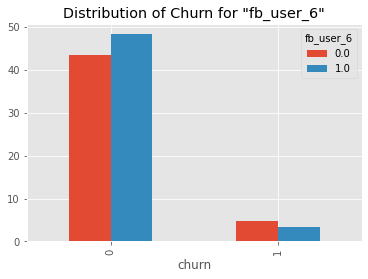

In [ ]:
#fb_user_6
plt.figure(figsize=(5,5))
(pd.crosstab(df_hvc['churn'], df_hvc['fb_user_6'], normalize='all')*100).plot.bar()
plt.title('Distribution of Churn for "fb_user_6"')
plt.show()

- **fb_user_7**

<Figure size 360x360 with 0 Axes>

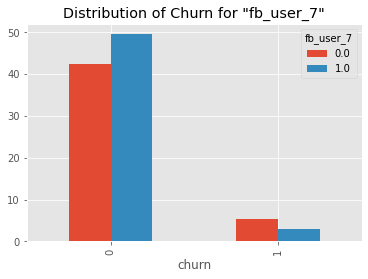

In [ ]:
## fb_user_7
plt.figure(figsize=(5,5))
(pd.crosstab(df_hvc['churn'], df_hvc['fb_user_7'], normalize='all')*100).plot.bar()
plt.title('Distribution of Churn for "fb_user_7"')
plt.show()

- **fb_user_8**

<Figure size 360x360 with 0 Axes>

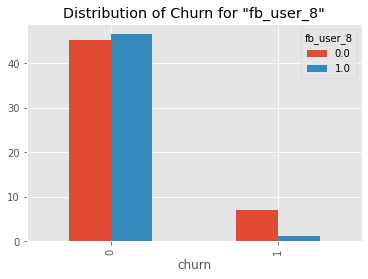

In [ ]:
#fb_user_8
plt.figure(figsize=(5,5))
(pd.crosstab(df_hvc['churn'], df_hvc['fb_user_8'], normalize='all')*100).plot.bar()
plt.title('Distribution of Churn for "fb_user_8"')
plt.show()

**Insights:**
- From the above, we notice that customers who have tendency for churn tend to also use less social media websites such as **Facebook**. While on the other end, non-churn customers tend to use these services more often.

- **night_pck_user_6**

In [ ]:
#Checking the % of churners in night_pck_user_6
pd.crosstab(df_hvc['churn'],df_hvc['night_pck_user_6'], normalize='index')*100

night_pck_user_6,0.0,1.0
churn,,
0,98.661103,1.338897
1,98.443261,1.556739


- **night_pck_user_7**

In [ ]:
#Checking the % of churners in night_pck_user_7
pd.crosstab(df_hvc['churn'],df_hvc['night_pck_user_7'], normalize='index')*100

night_pck_user_7,0.0,1.0
churn,,
0,98.722787,1.277213
1,99.057763,0.942237


- **night_pck_user_8**

In [ ]:
#Checking the % of churners in night_pck_user_8
pd.crosstab(df_hvc['churn'],df_hvc['night_pck_user_8'], normalize='index')*100

night_pck_user_8,0.0,1.0
churn,,
0,98.795356,1.204644
1,99.631299,0.368701


**Insights:**
- From above, we observed that among churners, the nigh pack usage is low but not that signicantly low relative to non-churners, for all the phases.

- **date_of_last_rech_data_6**

In [ ]:
#date_of_last_rech_data_6
pd.crosstab(df_hvc['churn'],df_hvc['date_of_last_rech_data_6'], normalize='index')*100

date_of_last_rech_data_6,0,1
churn,,
0,43.312772,56.687228
1,53.584596,46.415404


- **date_of_last_rech_data_7**

In [ ]:
#date_of_last_rech_data_7
pd.crosstab(df_hvc['churn'],df_hvc['date_of_last_rech_data_7'], normalize='index')*100

date_of_last_rech_data_7,0,1
churn,,
0,41.574746,58.425254
1,60.876690,39.123310


- **date_of_last_rech_data_8**

In [ ]:
#date_of_last_rech_data_8
pd.crosstab(df_hvc['churn'],df_hvc['date_of_last_rech_data_8'], normalize='index')*100

date_of_last_rech_data_8,0,1
churn,,
0,43.780842,56.219158
1,81.196231,18.803769


**Insights:**
- From the above two crosstables, we observed that for all the months churners tend not to recharge (date plan) while non-churner tend to recharge relatively more often.

- **date_of_last_rech_data_6**

In [ ]:
#date_of_last_rech_6
(pd.crosstab(df_hvc['churn'],df_hvc['date_of_last_rech_6'], normalize='index')*100)

date_of_last_rech_6,0,1
churn,,
0,0.203193,99.796807
1,0.696436,99.303564


- **date_of_last_rech_data_7**

In [ ]:
# date_of_last_rech_7
pd.crosstab(df_hvc['churn'],df_hvc['date_of_last_rech_7'], normalize='index')*100

date_of_last_rech_7,0,1
churn,,
0,0.163280,99.836720
1,2.171241,97.828759


- **date_of_last_rech_data_8**

In [ ]:
# date_of_last_rech_8
pd.crosstab(df_hvc['churn'],df_hvc['date_of_last_rech_8'], normalize='index')*100

date_of_last_rech_8,0,1
churn,,
0,0.928882,99.071118
1,13.396149,86.603851


**Insights:**
- From the above, we observed that there is hike in percentage of customers who does not recharge (voice services) in action phase, amongst churners.

Let's get derived matrics such that for date columns, if a user has _recharged during good phase and not during the action phase_, we mark them as 1 and 0 otherwise. Likewise for fb_user column, if user has used such services during good phase and not during action phase, we mark them as 1 and 0 otherwise. We would not derive such matric for night pack data as the different does not seem significant.

In [ ]:
#logic to obtain the columns as mentioned above

df_hvc['date_of_last_rech_'] = (df_hvc['date_of_last_rech_6'] | 
                                df_hvc['date_of_last_rech_7']) & (~ df_hvc['date_of_last_rech_8'])

df_hvc['date_of_last_rech_data_'] = (df_hvc['date_of_last_rech_data_6'] | 
                                     df_hvc['date_of_last_rech_data_7']) & (~ df_hvc['date_of_last_rech_data_8'])

df_hvc['fb_user_'] = (df_hvc['fb_user_6'].astype('int64') | 
                      df_hvc['fb_user_7'].astype('int64')) & (~ df_hvc['fb_user_8'].astype('int64'))


Let's visualize the relation of all the above three derived categorical features with the churn.

- **date_of_last_rech_**

In [ ]:
# date_of_last_rech_
pd.crosstab(df_hvc.churn, df_hvc.date_of_last_rech_, normalize='index')*100

date_of_last_rech_,0,1
churn,,
0,99.071118,0.928882
1,86.603851,13.396149


- **date_of_last_rech_data_**

In [ ]:
# date_of_last_rech_data_
pd.crosstab(df_hvc.churn, df_hvc.date_of_last_rech_data_, normalize='index')*100

date_of_last_rech_data_,0,1
churn,,
0,85.881713,14.118287
1,61.696026,38.303974


**Insights:**
- From above, we note that among churners, more percentage of customers (13.39%) tend to stop recharging for voice services in action phase as compared with non-churners (0.92%). 
- Also, among churners, more precentage of customers (33.3%) tend to stop rechargig for data services in action phase as compared with non-churners (14.11%).

- **fb_user_**

In [ ]:
# fb_user_ Vs Churn
pd.crosstab(df_hvc.churn, df_hvc.fb_user_, normalize='index')*100

fb_user_,0,1
churn,,
0,87.198839,12.801161
1,63.334699,36.665301


**Insights:**
- We note that more customers (36.66%) who churned, deliberately stopped using social media services during action phase, as compared with those (12.80%) who did not churn.

Let's utilise the three derived features as well, for our model.

### 5.2 Continuous data

Let's check the continuous columns.

In [ ]:
df_hvc[num_col].head()

,loc_ic_t2f_mou_6,offnet_mou_7,av_rech_amt_data_8,vol_2g_mb_7,arpu_8,max_rech_amt_7,sachet_2g_7,roam_ic_mou_8,loc_og_mou_6,loc_og_t2m_mou_8,std_og_t2f_mou_6,loc_ic_t2m_mou_7,total_rech_num_6,count_rech_3g_7,std_og_t2m_mou_7,loc_og_t2c_mou_8,isd_og_mou_6,max_rech_data_8,isd_ic_mou_6,loc_ic_t2t_mou_8,aon,std_ic_t2t_mou_7,spl_ic_mou_7,roam_og_mou_7,monthly_2g_7,loc_ic_mou_8,ic_others_6,loc_og_t2m_mou_7,loc_og_t2t_mou_6,std_ic_mou_6,arpu_2g_8,ic_others_7,roam_ic_mou_7,loc_ic_mou_6,total_ic_mou_7,monthly_2g_6,onnet_mou_7,loc_og_t2t_mou_8,aug_vbc_3g,std_og_t2t_mou_6,jul_vbc_3g,total_ic_mou_6,loc_og_t2c_mou_6,loc_og_t2m_mou_6,loc_og_mou_7,total_rech_data_6,arpu_3g_8,loc_og_t2f_mou_7,std_ic_t2f_mou_8,onnet_mou_8,total_rech_num_8,arpu_3g_7,loc_og_mou_8,std_og_t2t_mou_8,arpu_2g_7,std_og_t2m_mou_6,last_day_rch_amt_8,count_rech_2g_8,max_rech_data_7,loc_og_t2f_mou_6,arpu_6,og_others_8,mobile_number,roam_ic_mou_6,std_og_t2f_mou_8,total_rech_data_7,offnet_mou_8,loc_ic_t2m_mou_6,count_rech_3g_8,av_rech_amt_data_7,vol_3g_mb_7,loc_ic_mou_7,max_rech_data_6,spl_og_mou_6,std_og_mou_7,total_rech_num_7,total_rech_amt_7,loc_ic_t2m_mou_8,max_rech_amt_6,arpu_3g_6,count_rech_2g_7,std_og_t2t_mou_7,og_others_6,churn,count_rech_3g_6,isd_og_mou_8,loc_ic_t2f_mou_8,total_rech_data_8,spl_ic_mou_6,jun_vbc_3g,sachet_2g_6,og_others_7,std_ic_t2m_mou_7,std_ic_mou_7,ic_others_8,std_ic_t2f_mou_7,last_day_rch_amt_6,sachet_3g_8,onnet_mou_6,vol_3g_mb_8,arpu_7,total_og_mou_7,isd_ic_mou_7,loc_ic_t2f_mou_7,monthly_2g_8,total_rech_amt_6,spl_og_mou_7,isd_ic_mou_8,loc_og_t2c_mou_7,std_ic_t2m_mou_8,count_rech_2g_6,std_ic_t2m_mou_6,spl_og_mou_8,total_ic_mou_8,std_og_mou_8,monthly_3g_6,roam_og_mou_8,std_ic_t2t_mou_6,std_og_mou_6,sachet_3g_6,monthly_3g_8,sachet_3g_7,vol_2g_mb_8,std_ic_t2t_mou_8,total_rech_amt_8,total_og_mou_6,last_day_rch_amt_7,std_ic_t2f_mou_6,loc_ic_t2t_mou_7,std_og_t2f_mou_7,loc_og_t2f_mou_8,loc_ic_t2t_mou_6,std_ic_mou_8,av_rech_amt_data_6,isd_og_mou_7,arpu_2g_6,vol_3g_mb_6,roam_og_mou_6,std_og_t2m_mou_8,max_rech_amt_8,spl_ic_mou_8,total_og_mou_8,monthly_3g_7,vol_2g_mb_6,offnet_mou_6,loc_og_t2t_mou_7,sachet_2g_8
0,0.00,0.00,252.0,1.32,213.803,252,0,0.00,0.00,0.00,0.00,0.00,4,1.0,0.00,0.00,0.0,252.0,0.00,0.16,968,0.00,0.0,0.00,0,5.44,0.00,0.00,0.00,0.00,212.17,0.00,0.00,0.00,0.00,0,0.00,0.00,30.40,0.00,0.00,0.00,0.0,0.00,0.00,1.0,212.17,0.00,0.00,0.00,2,212.17,0.00,0.00,212.17,0.00,252,0.0,252.0,0.00,197.385,0.0,7000842753,0.00,0.00,1.0,0.00,0.00,1.0,252.0,150.76,0.00,252.0,0.0,0.00,3,252,4.13,252,212.17,0.0,0.00,0.0,1,1.0,0.00,1.15,1.0,0.00,101.20,0,0.0,0.00,0.00,0.00,0.00,252,0,0.00,109.61,214.816,0.00,0.00,0.00,0,362,0.0,0.00,0.0,0.00,0.0,0.00,0.00,5.44,0.00,1,0.00,0.00,0.00,0,1,0,5.75,0.00,252,0.00,252,0.00,0.00,0.00,0.00,0.00,0.00,252.0,0.00,212.17,83.57,0.00,0.00,252,0.0,0.00,1,30.13,0.00,0.00,0
7,152.16,567.16,0.0,0.00,3171.480,790,0,31.64,422.16,162.28,6.66,221.49,5,0.0,31.76,0.00,0.0,0.0,2.06,27.31,802,11.83,0.0,12.59,0,188.04,15.74,447.38,51.39,180.54,0.00,15.19,33.49,427.88,558.04,0,54.68,40.28,57.74,4.30,19.38,626.46,0.0,308.63,533.91,0.0,0.00,55.14,22.21,52.29,7,0.00,255.79,12.01,0.00,49.89,779,0.0,0.0,62.13,1069.180,0.0,7000701601,16.23,16.68,0.0,325.91,217.56,0.0,0.0,0.00,355.23,0.0,4.5,75.14,5,790,121.19,1580,0.00,0.0,23.29,0.0,1,0.0,10.01,39.53,0.0,0.21,18.74,0,0.0,126.99,173.08,15.14,34.24,0,0,57.84,0.00,1349.850,609.24,14.53,101.46,0,1580,0.0,31.59,0.0,141.33,0.0,91.44,6.50,428.74,77.84,0,38.06,36.89,60.86,0,0,0,0.00,30.39,3638,487.53,0,52.19,32.26,20.08,53.23,58.14,193.94,0.0,0.18,0.00,0.00,23.74,49.14,1580,0.0,350.16,0,0.00,453.43,31.38,0
8,0.00,80.63,69.0,356.00,137.362,154,1,0.00,378.09,50.54,0.00,13.98,19,0.0,10.04,7.15,0.0,23.0,0.00,0.31,315,0.58,0.0,0.00,1,15.79,0.00,70.58,297.13,22.43,0.00,0.00,0.00,81.43,28.49,0,351.03,12.49,21.03,116.56,910.65,103.86,0.0,80.96,288.18,0.0,19.83,0.00,0.00,35.08,14,0.00,63.04,22.58,0.00,13.69,10,3.0,154.0,0.00,378.721,0.0,7001524846,0.00,0.00,2.0,136.48,57.58,0.0,177.0,750.95,23.83,0.0,0.0,143.48,21,60

We can drop `mobile_number`, as the same seems to be serving the purpose of identity only. 

In [ ]:
#Dropping the mobile_number
df_hvc.drop(['mobile_number'], axis=1, inplace=True)

In [ ]:
#removing mobile_number from cont_col
num_col = set(num_col)

num_col.remove('mobile_number')

num_col= list(num_col)

As per the problem statement, we have months 6 (June) and 7 (July) as **The ‘good’ phase** while month 8 (August) as **The ‘action’ phase**. Let's check whether there is any significant difference amongst the average statistics for the month of June & July as compared with the month of August.

For the purpose of statistical analysis, let's get the average values of different predictors for the month of **good phase** (i.e. June and July) and compare the same with the **actions phase** (i.e. August).

In [ ]:
#bunching the diffrent continuous columns based on their months

cols_6_mon = []
cols_7_mon = []
cols_8_mon = []

for col in set(df_hvc.columns) - set(cat_col):
    if col[-1]=='6':
        cols_6_mon.append(col)
        
for col in set(df_hvc.columns) - set(cat_col):
    if col[-1]=='7':
        cols_7_mon.append(col)
        
for col in set(df_hvc.columns) - set(cat_col):
    if col[-1]=='8':
        cols_8_mon.append(col)
    
#sorting the columns
cols_6_mon = sorted(cols_6_mon)
cols_7_mon = sorted(cols_7_mon)
cols_8_mon = sorted(cols_8_mon)


In [ ]:
desc = [] #to store feature names
mean_6_7 = [] # to store means of different features forr june and july months

#getting the average values for the months of June and July and appending their means
for col6,col7 in zip(cols_6_mon,cols_7_mon):
    desc.append(col6[:-1])
    mean_6_7.append(((df_hvc[col6] + df_hvc[col7])/2).mean())
    

#appending the means of different columns of august
col8_val = []
for col8 in cols_8_mon:
    col8_val.append(df_hvc[col8].mean())


In [ ]:
#preparing the dataframe to display the statistics for good phase and actions phase

monthly_stats_df = pd.DataFrame(data={'desc':desc,'mean_6_7':mean_6_7,'col8_val':col8_val})

#Storing the difference of features between good phase and action phase
monthly_stats_df['val_diff'] = monthly_stats_df['col8_val'] - monthly_stats_df['mean_6_7']

#Storing the % for the above mentioned difference
monthly_stats_df['percentage_diff']=(monthly_stats_df['col8_val']-monthly_stats_df['mean_6_7']
                                    )/monthly_stats_df['mean_6_7']*100

#averace volume based cost for good phase and action phase 
avg_vbc_3g = ((df_hvc.jun_vbc_3g+df_hvc.jul_vbc_3g)/2).mean()
mean_aug_vbc_3g = df_hvc.aug_vbc_3g.mean()

#appending the values to dataframe
monthly_stats_df = monthly_stats_df.append({'desc':'vbc_3g',
                                           'mean_6_7':avg_vbc_3g,
                                           'col8_val':mean_aug_vbc_3g,
                                           'val_diff':(mean_aug_vbc_3g-avg_vbc_3g),
                                           'percentage_diff':(mean_aug_vbc_3g-avg_vbc_3g)/avg_vbc_3g*100},
                                           ignore_index=True)

In [ ]:
#display the statistics dataframe
monthly_stats_df.sort_values('percentage_diff', ascending=True)

,desc,mean_6_7,col8_val,val_diff,percentage_diff
24,og_others_,0.351998,0.057607,-0.294391,-83.634280
30,spl_ic_mou_,0.040400,0.026567,-0.013833,-34.239794
45,vol_2g_mb_,125.809755,105.913072,-19.896683,-15.814897
44,total_rech_num_,11.784924,9.972868,-1.812056,-15.376054
27,roam_og_mou_,23.361816,19.865615,-3.496201,-14.965451
38,std_og_t2m_mou_,183.677078,157.350068,-26.327010,-14.333313
21,monthly_2g_,0.178877,0.153628,-0.025249,-14.115345
36,std_og_mou_,355.555232,307.379315,-48.175917,-13.549489
26,roam_ic_mou_,14.376429,12.500551,-1.875878,-13.048288
39,std_og_t2t_mou_,170.059634,148.441175,-21.618459,-12.712281


**Insights:**
- From the above, we notice that _majority of services has comsumption reduced in action phase as compared to good phase._

In [ ]:
#columns with reduction in usage
reduction_cols = monthly_stats_df[monthly_stats_df.percentage_diff < 0].desc.values

These difference columns may be pivotal for our model building as the same might indicate churn. So, let's get the derived matrix out of these columns by getting the difference and use them as predictor for our model building.

In [ ]:
#deriving the difference columns between good and actions phase for reduction_cols

for col in reduction_cols:
    name='diff_'+col
    col_june = col+'6'
    col_july = col+'7'
    col_aug = col+'8'
    df_hvc[name] = df_hvc[col_aug] - ((df_hvc[col_june]+df_hvc[col_july])/2) 

In [ ]:
#check the shape of df_hvc now
df_hvc.shape

(30001, 207)

In [ ]:
#check the head of df_hvc
df_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,date_of_last_rech_,date_of_last_rech_data_,fb_user_,diff_arpu_2g_,diff_arpu_3g_,diff_arpu_,diff_av_rech_amt_data_,diff_count_rech_2g_,diff_count_rech_3g_,diff_ic_others_,diff_isd_ic_mou_,diff_isd_og_mou_,diff_last_day_rch_amt_,diff_loc_ic_mou_,diff_loc_ic_t2f_mou_,diff_loc_ic_t2m_mou_,diff_loc_ic_t2t_mou_,diff_loc_og_mou_,diff_loc_og_t2c_mou_,diff_loc_og_t2f_mou_,diff_loc_og_t2m_mou_,diff_loc_og_t2t_mou_,diff_max_rech_amt_,diff_max_rech_data_,diff_monthly_2g_,diff_monthly_3g_,diff_offnet_mou_,diff_og_others_,diff_onnet_mou_,diff_roam_ic_mou_,diff_roam_og_mou_,diff_sachet_2g_,diff_sachet_3g_,diff_spl_ic_mou_,diff_std_ic_mou_,diff_std_ic_t2f_mou_,diff_std_ic_t2m_mou_,diff_std_ic_t2t_mou_,diff_std_og_mou_,diff_std_og_t2f_mou_,diff_std_og_t2m_mou_,diff_std_og_t2t_mou_,diff_total_ic_mou_,diff_total_og_mou_,diff_total_rech_amt_,diff_total_rech_data_,diff_total_rech_num_,diff_vol_2g_mb_,diff_vol_3g_mb_
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,1,1,1,252,252,252,1,1,1,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1,0,0,0,0.00,0.000,7.7025,0.0,0.0,0.0,0.000,0.00

Now let's checkout the correlation of all the continuous predictors with the target variable i.e. Churn and hence find the top negatively correlated predictors. 

In [ ]:
corr_df = round(df_hvc[ list( set( df_hvc.columns ) - set( cat_col ) ) ].corr().churn.sort_values(ascending=False)*100, 3)

corr_df[corr_df.values<-10]

loc_ic_mou_7             -10.009
diff_count_rech_2g_      -10.019
count_rech_2g_8          -10.739
aon                      -10.828
diff_av_rech_amt_data_   -11.026
diff_loc_og_t2m_mou_     -11.488
last_day_rch_amt_8       -11.626
diff_max_rech_data_      -11.682
diff_total_rech_data_    -11.895
total_rech_data_8        -11.989
offnet_mou_8             -12.152
diff_loc_og_mou_         -12.238
max_rech_amt_8           -12.848
max_rech_data_8          -13.552
av_rech_amt_data_8       -13.746
diff_loc_ic_t2m_mou_     -13.785
total_og_mou_8           -14.544
diff_max_rech_amt_       -15.152
diff_loc_ic_mou_         -15.174
total_rech_num_8         -15.190
loc_og_t2m_mou_8         -15.247
loc_og_mou_8             -15.259
arpu_8                   -16.091
loc_ic_t2m_mou_8         -16.113
total_rech_amt_8         -16.127
diff_std_og_t2t_mou_     -17.114
loc_ic_mou_8             -17.239
diff_total_ic_mou_       -17.476
diff_std_og_t2m_mou_     -17.663
total_ic_mou_8           -17.838
diff_onnet

Let's plot them with respect to chrun, so as to visualize them better.

In [ ]:
#bunching the top negatively correlated (with churn) columns 
neg_corr_pre = list(corr_df[corr_df.values<-10].index)
neg_corr_pre

['loc_ic_mou_7',
 'diff_count_rech_2g_',
 'count_rech_2g_8',
 'aon',
 'diff_av_rech_amt_data_',
 'diff_loc_og_t2m_mou_',
 'last_day_rch_amt_8',
 'diff_max_rech_data_',
 'diff_total_rech_data_',
 'total_rech_data_8',
 'offnet_mou_8',
 'diff_loc_og_mou_',
 'max_rech_amt_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'diff_loc_ic_t2m_mou_',
 'total_og_mou_8',
 'diff_max_rech_amt_',
 'diff_loc_ic_mou_',
 'total_rech_num_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'arpu_8',
 'loc_ic_t2m_mou_8',
 'total_rech_amt_8',
 'diff_std_og_t2t_mou_',
 'loc_ic_mou_8',
 'diff_total_ic_mou_',
 'diff_std_og_t2m_mou_',
 'total_ic_mou_8',
 'diff_onnet_mou_',
 'diff_offnet_mou_',
 'diff_std_og_mou_',
 'diff_total_rech_num_',
 'diff_total_og_mou_',
 'diff_total_rech_amt_',
 'diff_arpu_']

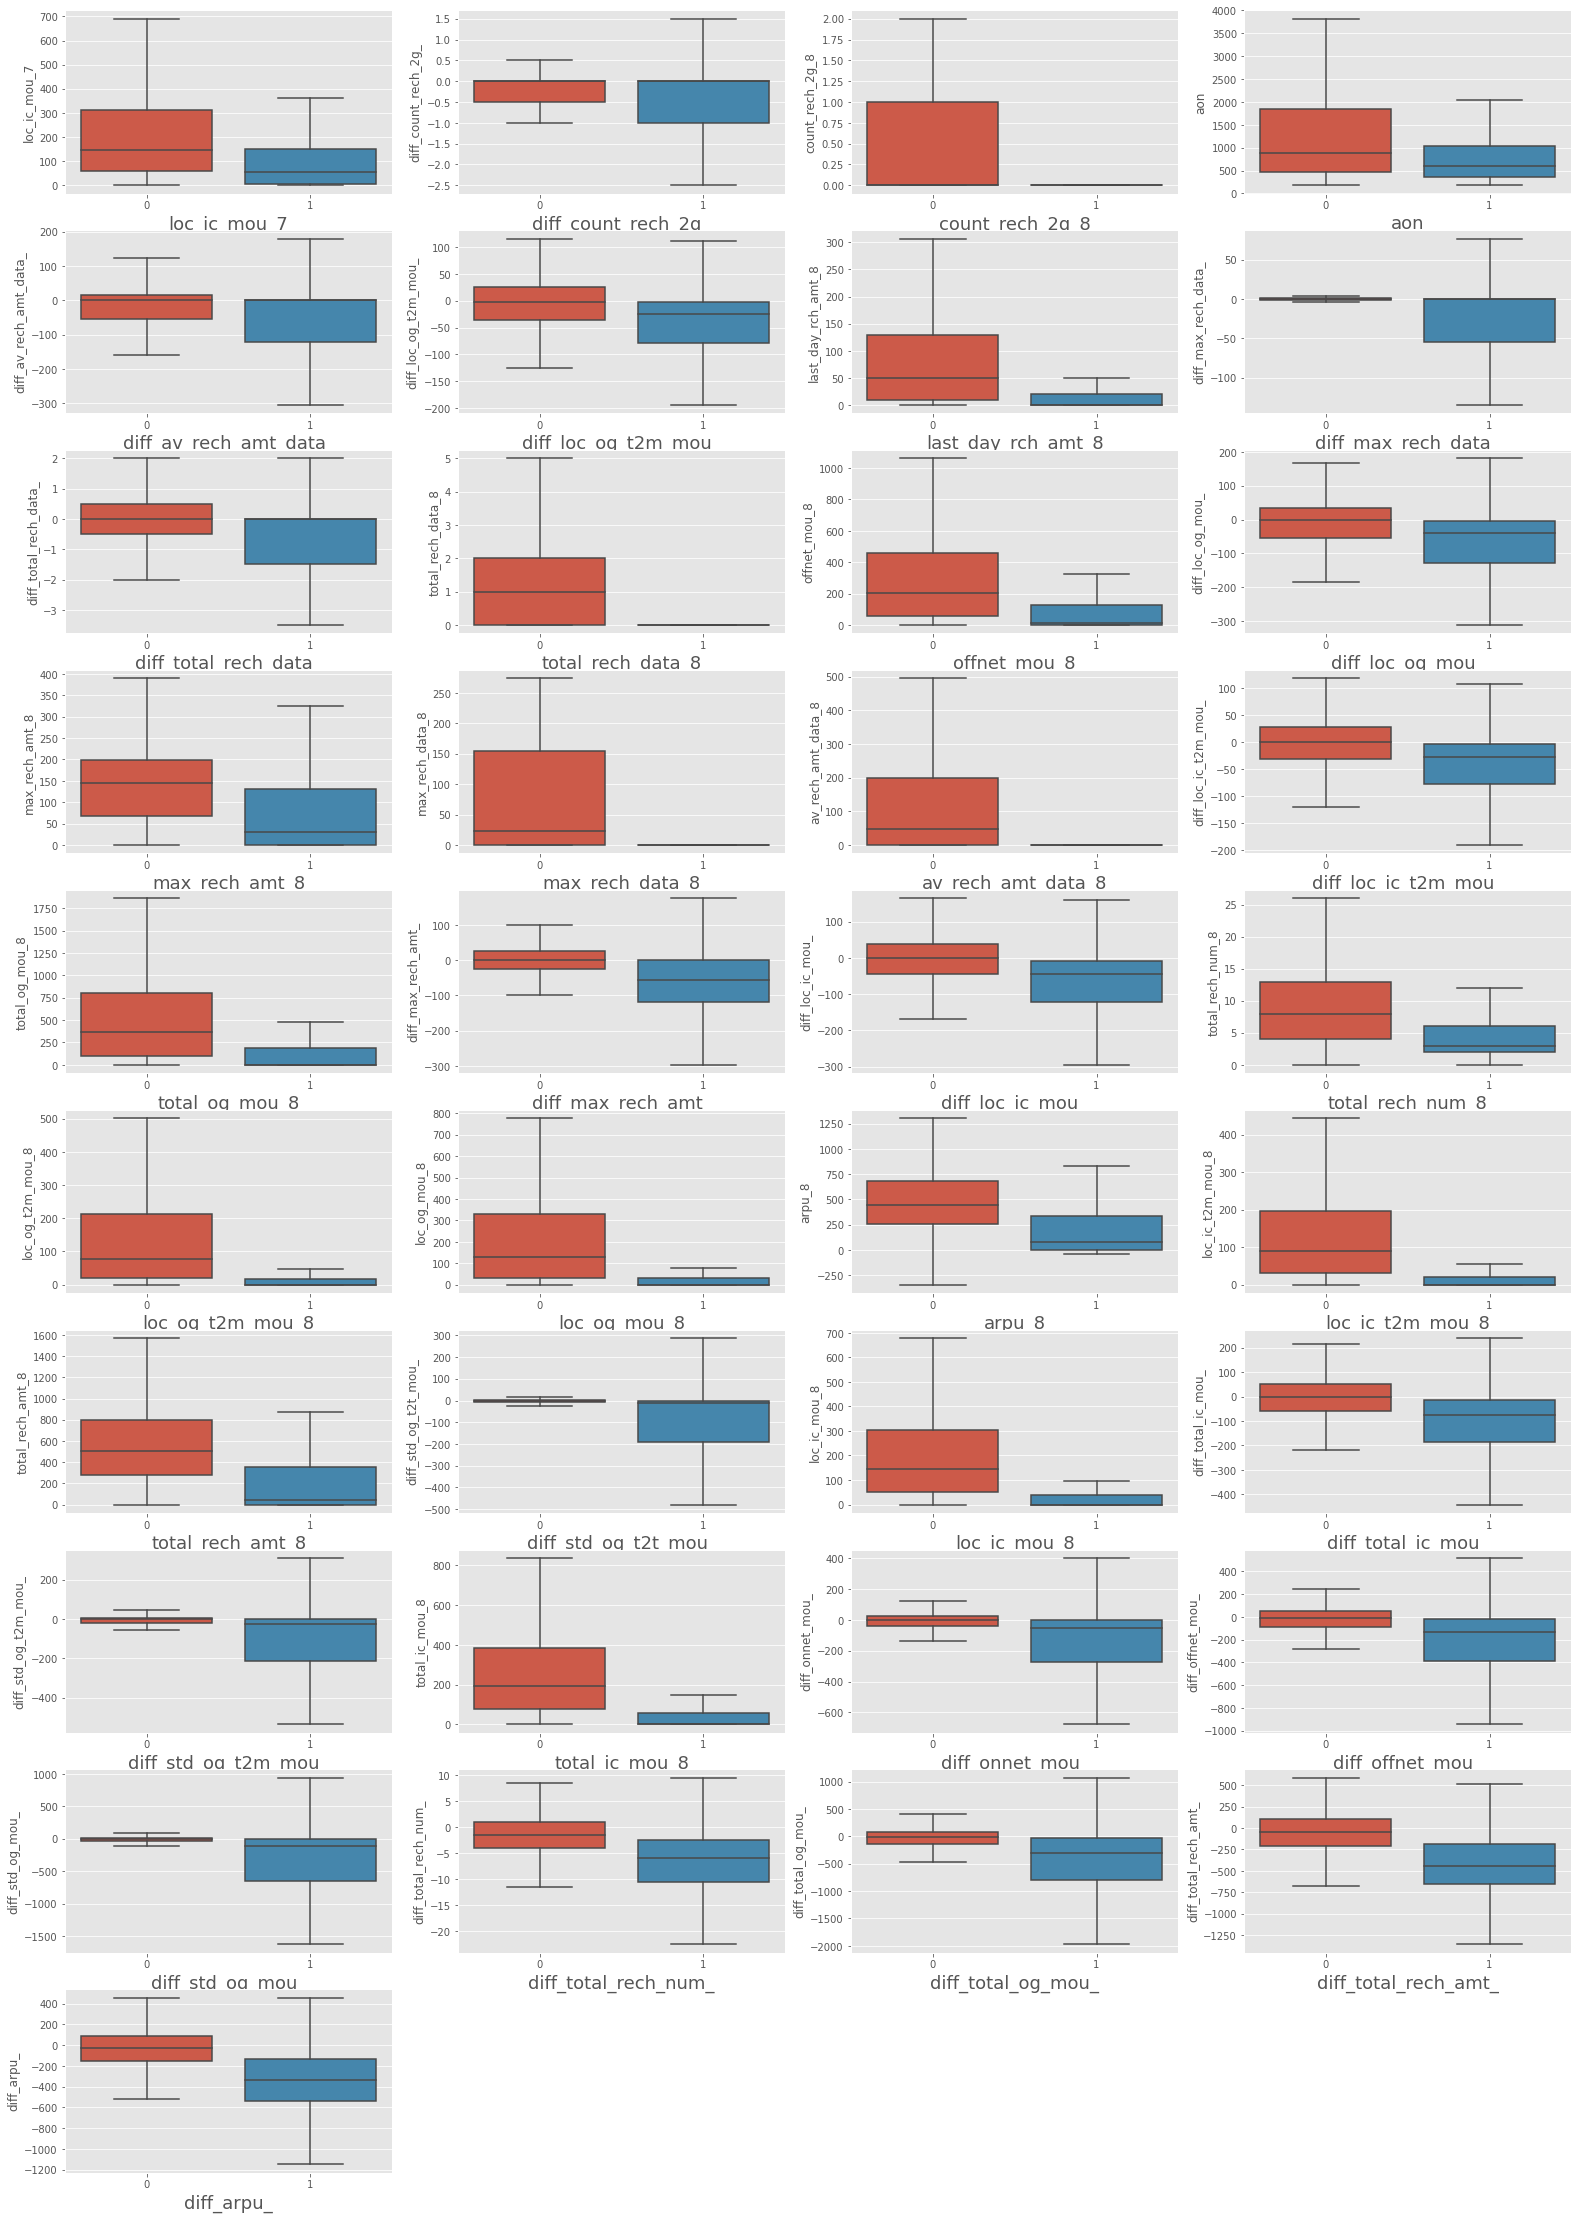

In [ ]:
#plotting the continuous negatively correlated columns

plt.figure(figsize=(27,60))
for m,n in enumerate(neg_corr_pre):
    plt.subplot(15,4,(m+1))
    sns.boxplot(df_hvc['churn'], df_hvc[n], showfliers=False)   #put showfliers=False to remove outliers from plot
    plt.xlabel(n,fontsize=18)
plt.show()

**Insights:**
- From the above, we note that in case of high negatively correlated variables, the median values in case of churn is lower as compared to non-churn cases. Ths same is intuitive as we note the significant reduction in the usage of different service during the action month (i.e. August) as compared to good months.

Let's check the churn rate for different `AON` i.e. Age on network - number of days the customer is using the operator T network.

In [ ]:
df_hvc.aon.describe()

count    30001.000000
mean     1209.368754 
std      957.677989  
min      180.000000  
25%      460.000000  
50%      846.000000  
75%      1756.000000 
max      4321.000000 
Name: aon, dtype: float64

Let's group this column into different categories, for ease of analysis.

In [ ]:
df_hvc['grouped_aon'] = pd.cut(df_hvc['aon'],[180,460,846,1756,4321], labels=['L','ML','MH','H'])
df_hvc['grouped_aon'].value_counts()

MH    7500
H     7499
L     7499
ML    7488
Name: grouped_aon, dtype: int64

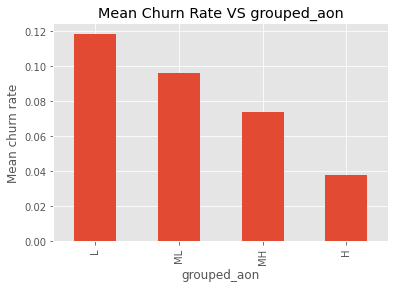

In [ ]:
df_hvc.groupby('grouped_aon').churn.mean().plot.bar()
plt.ylabel('Mean churn rate')
plt.title("Mean Churn Rate VS grouped_aon")
plt.show()

df_hvc.drop('grouped_aon', axis=1, inplace=True)

**Insights:** 
- From the above, we note that amongst high value customers, as their age as a user in network T increases, the mean churn rate decreases.

Let's check out the volume based cost (**VBC**) for different phases (**good** and **action**) for both churners and non-churners.

In [ ]:
df_hvc['VBC_june_july_avg'] = (df_hvc.jun_vbc_3g + df_hvc.jul_vbc_3g)/2

count    30001.000000
mean     168.698363  
std      392.776395  
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      158.000000  
max      8190.585000 
Name: VBC_june_july_avg, dtype: float64


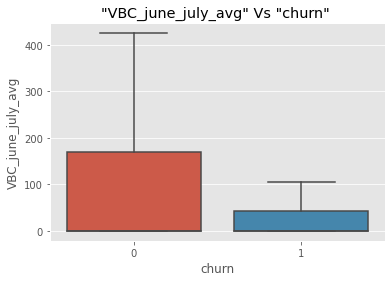

In [ ]:
print(df_hvc['VBC_june_july_avg'].describe())

sns.boxplot(x=df_hvc.churn, y=df_hvc.VBC_june_july_avg, showfliers=False)
plt.title('"VBC_june_july_avg" Vs "churn" ')
plt.show()

count    30001.000000
mean     169.138860  
std      420.974354  
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      128.800000  
max      12916.220000
Name: aug_vbc_3g, dtype: float64


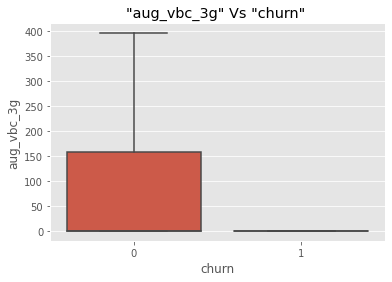

In [ ]:
print(df_hvc['aug_vbc_3g'].describe())

sns.boxplot(x=df_hvc.churn, y=df_hvc.aug_vbc_3g, showfliers=False)
plt.title('"aug_vbc_3g" Vs "churn" ')
plt.show()

**Insights:**
- From the above, we notice that VBC i.e. volume based cost are less for churners for both good as well as action phase. Especially in action phase, the VBC has reduced down to almost zero for churners.
Let's keep `VBC_june_july_avg` as the same seems an important indicator of churn.

Let's get the difference between the `VBC_june_july_avg` and `aug_vbc_3g` and plot the same agianst churn.

In [ ]:
#  VBC Difference between the good and action phase 
df_hvc.diff_vbc = df_hvc.aug_vbc_3g - df_hvc.VBC_june_july_avg 

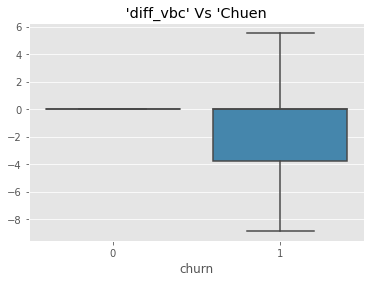

In [ ]:
sns.boxplot(x=df_hvc.churn, y=df_hvc.diff_vbc, showfliers=False)
plt.title( " 'diff_vbc' Vs 'Chuen ")
plt.show()

**Insights:**
- From the above, we note that there is reduction in volume based cost in action phase as compared with the good phase.

### 5.3 Summary insights after EDA:

1. There are total two kinds of missing values:
    - One where customers have not used voice/data as they have not recharged for voice/data for the correspondig months.
    - Second where customers have deliberately not used voice/data even after recharging for voice/data for the corresponding months.
2. Churn rate is relatively high amongst customers who have deliberately not used services even after recharging for the same, which shows their dissatisfaction towards network.
3. As the customers starts to reduce their sevice usage from Good phase to Action phase, the likelihood of churn increases. The same is visible from the box plot of various continuous negatively correlated derived variables above.
4. Tendency of data/ voice recharge also decreases from Good phase to Action phase, amongst churners.
5. Churners tend to use relatively less social media websites (such as Facebook, etc.) from Good phase to Action phase.
6. Old customers tend to churn less as compared with new customers.
7. There is significant reduction in usage of volume based cost (VBC) services amongst churners, while the same trend is not noticed amongst non-churners.

## 6.Data Preparation

### 6.1 Seperating X and y

In [ ]:
y = df_hvc.churn
X = df_hvc.drop('churn', axis=1)

In [ ]:
print(X.shape, y.shape)

(30001, 207) (30001,)


### 6.2 Handling the class imbalance

Let's check the percentage of churn left in our final cleaned dataset.

In [ ]:
y.value_counts(normalize=True)*100

0    91.863605
1    8.136395 
Name: churn, dtype: float64

From the above, we notice that in our final prepared data, we have only **8.13%** of churn while **91.86%** non-churn. Hence our dataset is highly imbalanced. We need to take care of this imbalance since otherwise dimentionalitiy reduction like PCA might eliminate those dimentions, which may be the indicators of minority class i.e. churn here. 

Let's use **SMOTE** i.e. Synthetic Minority Oversampling Technique to handle such situation. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

courtesy: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
#using SMOTE to oversample the dataset properly

smote = SMOTE(random_state=1)

X_sm, y_sm = smote.fit_sample(X=X, y=y)

In [ ]:
#check the shape of X_sm
X_sm.shape

(55120, 207)

In [ ]:
#check the shape of y_sm
y_sm.shape

(55120,)

In [ ]:
#check the percantage value counts of churn
# y_sm.value_counts(normalize=True)*100
unique, counts = np.unique(y_sm, return_counts=True)
print(np.asarray((unique, counts)).T )

[[    0 27560]
 [    1 27560]]


From above, we notice that both the classed have become perfectly balanced now. So now we can fearlessly apply dimentionality reduction technique i.e. PCA to our dataset.

### 6.3 Train-Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state = 42)  

### 6.4 Scalling the X

In [ ]:
#use MinMaxScaler is scale the predictors (X)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#converting array into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,date_of_last_rech_,date_of_last_rech_data_,fb_user_,diff_arpu_2g_,diff_arpu_3g_,diff_arpu_,diff_av_rech_amt_data_,diff_count_rech_2g_,diff_count_rech_3g_,diff_ic_others_,diff_isd_ic_mou_,diff_isd_og_mou_,diff_last_day_rch_amt_,diff_loc_ic_mou_,diff_loc_ic_t2f_mou_,diff_loc_ic_t2m_mou_,diff_loc_ic_t2t_mou_,diff_loc_og_mou_,diff_loc_og_t2c_mou_,diff_loc_og_t2f_mou_,diff_loc_og_t2m_mou_,diff_loc_og_t2t_mou_,diff_max_rech_amt_,diff_max_rech_data_,diff_monthly_2g_,diff_monthly_3g_,diff_offnet_mou_,diff_og_others_,diff_onnet_mou_,diff_roam_ic_mou_,diff_roam_og_mou_,diff_sachet_2g_,diff_sachet_3g_,diff_spl_ic_mou_,diff_std_ic_mou_,diff_std_ic_t2f_mou_,diff_std_ic_t2m_mou_,diff_std_ic_t2t_mou_,diff_std_og_mou_,diff_std_og_t2f_mou_,diff_std_og_t2m_mou_,diff_std_og_t2t_mou_,diff_total_ic_mou_,diff_total_og_mou_,diff_total_rech_amt_,diff_total_rech_data_,diff_total_rech_num_,diff_vol_2g_mb_,diff_vol_3g_mb_,VBC_june_july_avg
0,0.198007,0.138154,0.018782,0.019595,0.035692,0.001082,0.077592,0.082116,0.001516,0.000000,0.000722,0.000122,0.000000,0.016035,0.006159,0.001453,0.003355,0.000000,0.009818,0.010842,0.000000,0.000000,0.000000,0.0,0.000023,0.005039,0.000000,0.005242,0.009674,0.000000,0.018352,0.032137,0.000000,0.072278,0.074669,0.000000,0.0,0.000003,0.0,0.087296,0.086850,0.000000,0.0,0.0,0.0,0.002674,0.009284,0.000000,0.003107,0.0,0.0,0.074631,0.091142,0.000000,0.001345,0.007189,0.000000,0.015839,0.009755,0.000000,0.003963,0.000314,0.000000,0.012014,0.012708,0.000000,0.000763,1.646380e-07,0.000000,0.001176,0.001726,0.000000,0.0,0.000007,0.0,0.001762,0.000923,0.000000,0.012854,0.011762,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.084613,0.117781,0.02641

In [ ]:
X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,date_of_last_rech_,date_of_last_rech_data_,fb_user_,diff_arpu_2g_,diff_arpu_3g_,diff_arpu_,diff_av_rech_amt_data_,diff_count_rech_2g_,diff_count_rech_3g_,diff_ic_others_,diff_isd_ic_mou_,diff_isd_og_mou_,diff_last_day_rch_amt_,diff_loc_ic_mou_,diff_loc_ic_t2f_mou_,diff_loc_ic_t2m_mou_,diff_loc_ic_t2t_mou_,diff_loc_og_mou_,diff_loc_og_t2c_mou_,diff_loc_og_t2f_mou_,diff_loc_og_t2m_mou_,diff_loc_og_t2t_mou_,diff_max_rech_amt_,diff_max_rech_data_,diff_monthly_2g_,diff_monthly_3g_,diff_offnet_mou_,diff_og_others_,diff_onnet_mou_,diff_roam_ic_mou_,diff_roam_og_mou_,diff_sachet_2g_,diff_sachet_3g_,diff_spl_ic_mou_,diff_std_ic_mou_,diff_std_ic_t2f_mou_,diff_std_ic_t2m_mou_,diff_std_ic_t2t_mou_,diff_std_og_mou_,diff_std_og_t2f_mou_,diff_std_og_t2m_mou_,diff_std_og_t2t_mou_,diff_total_ic_mou_,diff_total_og_mou_,diff_total_rech_amt_,diff_total_rech_data_,diff_total_rech_num_,diff_vol_2g_mb_,diff_vol_3g_mb_,VBC_june_july_avg
0,0.304026,0.229384,0.061652,0.020191,0.018624,0.009060,0.479077,0.510391,0.076228,0.000000,0.000127,0.018533,0.000000,0.000904,0.10866,0.012385,0.010259,0.001401,0.023441,0.013104,0.001878,0.005129,0.004488,0.000000,0.000000,0.001240,0.002540,0.018609,0.018375,0.002209,0.009405,0.009164,0.002623,0.466670,0.522776,0.037036,0.000000,0.016056,0.0,0.468343,0.451301,0.038460,0.0,0.000059,0.0,0.007385,0.003561,0.029564,0.002287,0.0,0.0,0.389409,0.447099,0.041676,0.008434,0.009679,2.097706e-03,0.008534,0.015930,0.001317,0.000909,0.000850,0.000000,0.012765,0.019007,0.002693,0.002628,0.002909,0.000123,0.003392,0.012589,0.000175,0.000000,0.000428,0.0,0.005506,0.009715,0.000256,0.016332,0.024088,0.002644,0.000000,0.000000,0.000000,0.000116,0.0,0.0,0.000000,0.00

**Dimentionality reduction using PCA:**

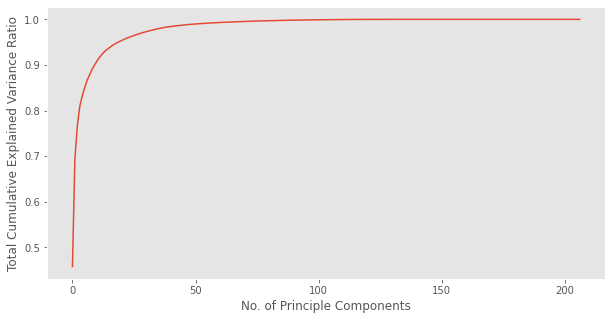

In [ ]:
#use principal component analysis (PCA) for dimensionality reduction
pca = PCA(random_state=100)
pca.fit(X_train_scaled)
var_cumu = np.cumsum(pca.explained_variance_ratio_)
#plotting different variance for chosen no. of principle components
plt.figure(figsize=(10,5))    
plt.plot(var_cumu)
plt.xlabel('No. of Principle Components')
plt.ylabel('Total Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [ ]:
#check cumulative variance explained by top 25 principle components 
var_cumu[25-1]


0.9627239267791581

From the above, we note that after 25, the total explained variance ratio seems to flatten. Hence we should go ahead with those PCs only.

In [ ]:
#using top PCs for data preparation for our model
pc2 = PCA(25, random_state=100)
new_train_data = pc2.fit_transform(X_train_scaled)
new_test_data = pc2.transform(X_test_scaled)
pc_cols = []
for i in range(25):
    pc_cols.append('PC'+str(i))
X_train_pca = pd.DataFrame(new_train_data, columns=pc_cols)
X_test_pca = pd.DataFrame(new_test_data, columns=pc_cols)

In [ ]:
X_train_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,-1.091396,-0.263461,0.029287,-0.080903,-0.129565,-0.122856,-0.003330,-0.032019,-0.028756,0.016550,-0.002771,-0.027252,0.008245,0.089479,-0.003292,-0.008524,-0.025750,0.011971,0.007040,-0.029072,-0.044467,-0.031139,-0.023773,0.000261,0.000060
1,0.754357,1.330613,0.363978,-0.225558,-0.110430,-0.114773,0.045181,0.021821,-0.067408,0.012785,-0.053434,-0.037550,-0.054212,0.007131,0.055729,-0.006685,0.022904,0.024270,0.000566,0.032682,0.013453,0.005229,0.002901,-0.013409,0.025427
2,-0.351064,-1.051018,-0.220652,0.045388,0.395101,0.461422,-0.565815,-0.140855,0.091849,-0.228309,-0.061911,-0.021549,0.018378,0.022908,-0.068385,-0.005299,-0.039592,0.013001,-0.079763,0.016656,0.026929,-0.006077,-0.231540,0.178223,-0.161329
3,-1.078520,-0.262595,0.023312,-0.075944,-0.101195,-0.163421,-0.053316,-0.197477,-0.067935,0.065587,0.037656,-0.015625,-0.024626,-0.018990,0.040620,-0.005245,-0.019266,-0.003736,0.006247,0.012795,0.023054,-0.026788,0.010577,0.077389,0.073298
4,-1.079000,-0.258428,0.016033,-0.061218,-0.070432,-0.163555,-0.044712,-0.153872,-0.047454,0.062463,-0.025476,0.161873,-0.035399,-0.025699,-0.166875,-0.014888,-0.035151,0.027331,0.021935,-0.045656,-0.079787,-0.006792,-0.014658,-0.003251,0.001371


In [ ]:
X_train_pca.shape

(38584, 25)

In [ ]:
y_train.shape

(38584,)

In [ ]:
X_test_pca.head()


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,0.477087,1.185163,0.281911,-0.286040,-0.262318,0.148816,0.292500,0.838015,0.359792,-0.123532,-0.182983,-0.065725,0.263631,0.756037,0.115540,-0.044885,0.007320,-0.082395,0.020724,-0.076130,0.011330,0.046392,-0.000782,-0.028513,0.086417
1,-0.856554,0.015634,0.344427,-0.054609,0.005996,0.092901,0.179767,-0.168407,0.223885,-0.090167,-0.065337,0.201241,0.006693,0.068165,-0.076593,0.197875,-0.096904,0.102661,0.001612,-0.040870,0.085237,-0.240071,-0.091278,-0.081562,0.038721
2,0.770348,1.341788,0.337313,-0.213680,-0.022485,-0.185704,-0.023754,0.003000,0.134723,0.247157,0.121810,-0.074852,0.083990,-0.007466,-0.008964,-0.012680,-0.005867,-0.047050,0.045786,-0.177274,0.085047,0.043594,-0.004752,-0.012499,-0.036935
3,0.487945,-0.570116,-1.104352,-0.245560,-0.142983,0.183675,-0.290970,-0.171605,0.066126,-0.049456,-0.097574,-0.009346,-0.121537,0.009375,0.024336,0.012219,-0.051988,0.064711,0.061636,-0.065938,0.053349,-0.022365,0.089016,-0.031211,0.003279
4,-0.097080,1.485762,-0.900144,0.788161,0.072934,0.154545,-0.094829,-0.085671,-0.110832,-0.106906,0.000416,-0.043245,0.093091,-0.054960,0.082588,-0.025484,-0.123637,0.014486,-0.047530,0.112144,-0.049958,0.060165,-0.071255,-0.051787,-0.052390


 ## 7.Model building (I): Performance Models including PCA

**Let’s use the following ML techniques with PCA for our classification task:**

**- Logistic Regression**


**- Random Forrest**


**- XGBoost**

### 7.1 Logistics Regression with PCA:

In [ ]:
lrm = LogisticRegression()
lrm.fit(X_train_pca, y_train)

#print the classification report
print(classification_report(y_test, lrm.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, lrm.predict(X_test_pca)))

           

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      8208
           1       0.83      0.82      0.82      8328

    accuracy                           0.82     16536
   macro avg       0.82      0.82      0.82     16536
weighted avg       0.82      0.82      0.82     16536

ROC score: 0.8210179076012156


**7.1.1 Tuning the hyperparameters**

Let’s use l2 regularizations along with tuning of C hyperpameter using RandomizedSearchCV and find the best set of hyprparameters for the given problem.
Let’s tune the hyperparameters in the following fashion:
‘penalty’: Used to specify the norm used in the penalization i.e. l1 or l2 regularization. Let’s keep it [l2]
‘C’: Inverse of regularization strength. Let’s keep it [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
# Create a based model
lr_model = LogisticRegression()

In [ ]:
# Instantiate the grid search model
lr_model_random_search = RandomizedSearchCV(estimator = lr_model, param_distributions = param_grid, scoring= 'recall', 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True, n_iter=15)
lr_model_random_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
           

In [ ]:
lr_model_random_search.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#saving the CV results into an object
cv_results= pd.DataFrame(lr_model_random_search.cv_results_)

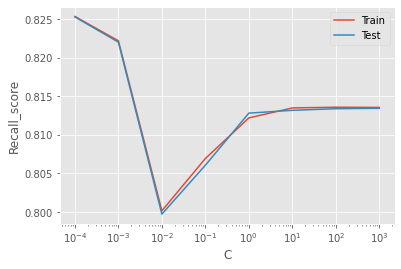

In [ ]:
#plotting R2 score vs alpha value
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], label='Test')
plt.xlabel('C')
plt.ylabel('Recall_score')
plt.xscale('log')
plt.legend()
plt.show()

Let's check C=0.001 and C=0.01 along with l2 regularization. Let's use them and build our final model for logistic regression.

In [ ]:
lrm_final = LogisticRegression(penalty='l2', C=0.01)

lrm_final.fit(X_train_pca, y_train)

#print the classification report
print(classification_report(y_test, lrm_final.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, lrm_final.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      8208
           1       0.77      0.81      0.79      8328

    accuracy                           0.78     16536
   macro avg       0.78      0.78      0.78     16536
weighted avg       0.78      0.78      0.78     16536

ROC score: 0.77962176494711


In [ ]:
lrm_final = LogisticRegression(penalty='l2', C=0.001)

lrm_final.fit(X_train_pca, y_train)

#print the classification report
print(classification_report(y_test, lrm_final.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, lrm_final.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.78      0.61      0.69      8208
           1       0.68      0.82      0.75      8328

    accuracy                           0.72     16536
   macro avg       0.73      0.72      0.72     16536
weighted avg       0.73      0.72      0.72     16536

ROC score: 0.719481520804894


We notice that C=0.001 is increasing recall but reducing ROC score. So from above, we have got C=0.01 as the best value of hyperparameter for logistic regression with l2 regularization.



### 7.2 Random Forest with PCA

6.2.1 Model with default hyperparameters

In [ ]:
rfcm = RandomForestClassifier()

rfcm.fit(X_train_pca, y_train)

print(classification_report(y_test, rfcm.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, rfcm.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8208
           1       0.94      0.95      0.94      8328

    accuracy                           0.94     16536
   macro avg       0.94      0.94      0.94     16536
weighted avg       0.94      0.94      0.94     16536

ROC score: 0.9438507311345927


**7.2.1 Tuning the hyperparameters**

Let's tune the hyperparameters in the following fashion:

- 'max_depth': The maximum depth of the tree. Let's keep it [12,18]
- 'n_estimators': The number of trees in the forest. Let's keep it [100],
- 'max_features': The number of features to consider when looking for the best split. Let's keept it as total no. of predictors i.e. [X_train_pca.shape[1]],
- 'min_samples_leaf': The minimum number of samples required to be at a leaf node.Let's keep it as [10,20],
- 'min_samples_split': The minimum number of samples required to split an internal node. Let's keep it as [10,20,30]

The above code has been hashed out as it is time consuming. The same was ran on Google colab and the results obtained has been reproduced below.

In [ ]:
# # Create the parameter grid based on the results of random search 
# param_grid = {
#    'max_depth': [12,18],
#    'n_estimators': [100],
#    'max_features': [X_train_pca.shape[1]],
#    'min_samples_leaf': [10,20],
#    'min_samples_split': [10,20,30]
# }
# #Create a based model
# rf_model = RandomForestClassifier()

# #Instantiate the grid search model
# rf_random_search = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, scoring= 'recall', 
#                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True, n_iter=10)

# rf_random_search.fit(X_train_pca, y_train)

# rf_random_search.best_estimator_

Upon running the above code, the best values of hyperparameters obtained as as under:
- max_depth= 18
- n_estimators= 100 
- max_features= 25
- min_samples_leaf= 10
- min_samples_split= 10

In [ ]:
#running the model on best obtained set of hyperparameters
rfcm = RandomForestClassifier(max_depth= 18, n_estimators= 100, max_features= 25, 
                              min_samples_leaf= 10, min_samples_split= 10)

rfcm.fit(X_train_pca, y_train)

print(classification_report(y_test, rfcm.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, rfcm.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      8208
           1       0.92      0.91      0.92      8328

    accuracy                           0.92     16536
   macro avg       0.92      0.92      0.92     16536
weighted avg       0.92      0.92      0.92     16536

ROC score: 0.9169940691867356


###  7.3 XGBoost With PCA

**7.3.1 Model with default hyperparameters**

In [ ]:
xgbm = XGBClassifier()
xgbm.fit(X_train_pca, y_train)

print(classification_report(y_test, xgbm.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, xgbm.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      8208
           1       0.88      0.86      0.87      8328

    accuracy                           0.87     16536
   macro avg       0.87      0.87      0.87     16536
weighted avg       0.87      0.87      0.87     16536

ROC score: 0.8683752338338642


**7.3.2 Tuning the hyperparameters**

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
#folds = 5

# specify range of hyperparameters
#param_grid = {'learning_rate': [0.1,0.2,0.3], 
 #            'subsample': [0.3,0.4,0.5]}          


# specify model
#xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
#model_cv = RandomizedSearchCV(estimator = xgb_model, 
      #                  param_distributions = param_grid, 
     #                   scoring= 'recall', 
    #                    cv = folds, 
   #                     n_jobs = -1,
  #                      verbose = 1,
 #                       return_train_score=True, n_iter=10)      

#model_cv.fit(X_train_pca, y_train)

#model_cv.best_estimator_

*The above code has been hashed out as it is time consuming. The same was ran on Google colab and the results obtained has been reproduced below.*

Upon running the above code, the best values of hyperparameters obtained as as under:
- learning_rate=0.3
- subsample=0.5

In [ ]:
#running the model on the best obtained set of hyperparameters
xgbm = XGBClassifier(learning_rate=0.3, subsample=0.5)
xgbm.fit(X_train_pca, y_train)

print(classification_report(y_test, xgbm.predict(X_test_pca)))
print("ROC score:", roc_auc_score(y_test, xgbm.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      8208
           1       0.90      0.87      0.89      8328

    accuracy                           0.89     16536
   macro avg       0.89      0.89      0.89     16536
weighted avg       0.89      0.89      0.89     16536

ROC score: 0.8881004895764869


### 7.4 Conclusion:

- Upon running the above models and tunining the corresponding hyperparameters, we note that hyperparameter tuning does not result in any significant imporvement in the performance of the model when we consider Recall and ROR as the metric of measurement. 
- The summary of different models and the corresponding obtained performance metrics values are as under:

| Model name | Hyperparameter tuning | Recall | ROC score |
| --- | --- | --- | --- |
| Logistic Regression | Before | 0.83 | 0.83 |
| Logistic Regression | After | 0.86 | 0.80 |
| Random Forest | Before | 0.94 | 0.94 |
| Random Forest | After | 0.91| 0.91 |
| XGBoost | Before | 0.92 | 0.92 |
| XGBoost | After | 0.92 | 0.92 |

- From the above, we note that Logistic Regression is giving inferior results as compared with the other two ML techniques.
- The best model out of the above three would be **XGBoost classifier** with Recall of 92% and ROC score of 92%. Though Random Forest gives the same level of performance for the given dataset, but it is relatively slow and computationally expensive. Hyperparameter tuning should be used as the same reduces the hyperparameter space and hence fast track the modelling.

## 8.Model building (II): Interpretable Model without implementing PCA

Now our second objective is to identify the important features for the recommendations purpose. Let's use the logistic regression for the same to identify them. Firstly, let's identify the presence of multi-collinearity in our cleaned dataset.

We would use new scaler to scale train and test predictors since we do not want to use augmentated data created by SMOTE.

### 8.1 Handling Data Imbalance without PCA 

In [ ]:
#splitting into train and test sets
#stratify=y to get balance in train and test splits
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) 

#use MinMaxScaler is scale the predictors (X)
scaler2 = MinMaxScaler()

X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

#converting array into dataframe
X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=X_train2.columns)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns=X_test2.columns)

* Let's first check the shape of the dataset. 

In [ ]:
print(X_train_scaled2.shape, X_test_scaled2.shape, y_train2.shape, y_test2.shape)

(21000, 207) (9001, 207) (21000,) (9001,)


### 8.2 RFE feature Elimination

Let's first use RFE (recursive feature elimination) to eliminate features with high multi-collinearity. We would use RFE to reduce our no. of features down to top 15.

In [ ]:
lr = LogisticRegression(random_state=1)
rfe = RFE(lr, 15)             
rfe = rfe.fit(X_train_scaled2, y_train2)

In [ ]:
#check for the different support and ranking
list(zip(X_train_scaled2.columns,rfe.support_,rfe.ranking_))

[('arpu_6', False, 22),
 ('arpu_7', False, 58),
 ('arpu_8', False, 67),
 ('onnet_mou_6', False, 110),
 ('onnet_mou_7', False, 163),
 ('onnet_mou_8', False, 26),
 ('offnet_mou_6', False, 156),
 ('offnet_mou_7', False, 73),
 ('offnet_mou_8', False, 21),
 ('roam_ic_mou_6', False, 12),
 ('roam_ic_mou_7', False, 32),
 ('roam_ic_mou_8', False, 116),
 ('roam_og_mou_6', False, 28),
 ('roam_og_mou_7', False, 2),
 ('roam_og_mou_8', False, 19),
 ('loc_og_t2t_mou_6', False, 171),
 ('loc_og_t2t_mou_7', False, 138),
 ('loc_og_t2t_mou_8', False, 60),
 ('loc_og_t2m_mou_6', False, 17),
 ('loc_og_t2m_mou_7', False, 59),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 121),
 ('loc_og_t2f_mou_7', False, 82),
 ('loc_og_t2f_mou_8', False, 48),
 ('loc_og_t2c_mou_6', False, 76),
 ('loc_og_t2c_mou_7', False, 75),
 ('loc_og_t2c_mou_8', False, 119),
 ('loc_og_mou_6', False, 49),
 ('loc_og_mou_7', False, 31),
 ('loc_og_mou_8', False, 4),
 ('std_og_t2t_mou_6', False, 152),
 ('std_og_t2t_mou_7', False,

In [ ]:
#seperate RFE support and non-support columns
col = X_train_scaled2.columns[rfe.support_]
print('Columns whom RFE supports are: \n', X_train_scaled2.columns[rfe.support_])
print('*'*80)
print('Columns whom RFE doesnt support are: \n', X_train_scaled2.columns[~rfe.support_])

Columns whom RFE supports are: 
 Index(['loc_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'count_rech_2g_8', 'av_rech_amt_data_8',
       'monthly_2g_8', 'diff_arpu_', 'diff_total_ic_mou_',
       'diff_total_og_mou_', 'diff_total_rech_amt_', 'diff_total_rech_num_'],
      dtype='object')
********************************************************************************
Columns whom RFE doesnt support are: 
 Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'diff_std_ic_t2m_mou_', 'diff_std_ic_t2t_mou_', 'diff_std_og_mou_',
       'diff_std_og_t2f_mou_', 'diff_std_og_t2m_mou_', 'diff_std_og_t2t_mou_',
       'diff_total_rech_data_', 'diff_vol_2g_mb_', 'diff_vol_3g_mb_',
       'VBC_june_july_avg'],
      dtype='object', length=192)


We are left with above 15 columns whom RFE supports. Let’s build model using statsmodel, for the detailed statistical analysis and manual feature elimination.

### 8.3 VIF Feature Elimination

In [ ]:
# function to find VIF of different features
def find_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
# Creating X_train dataframe with RFE selected 15 variables

X_train_rfe = X_train_scaled2[col]
X_train_rfe = sm.add_constant(X_train_rfe)

lm_1 = sm.GLM(y_train2.tolist(), X_train_rfe, family = sm.families.Binomial())
res = lm_1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3999.1
Date:                Tue, 10 Aug 2021   Deviance:                       7998.3
Time:                        08:02:35   Pearson chi2:                 1.56e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.3647 

Looking at the p-values, there are certain predictors with p-valus more that 5%. Let’s checkout the VIF as well.

In [ ]:
#find VIF of different features of X_train_rfe
find_vif(X_train_rfe)

,Features,VIF
0,const,1228.41
4,loc_ic_mou_8,7.51
5,total_ic_mou_8,5.31
3,loc_ic_t2m_mou_8,3.99
11,diff_arpu_,3.99
14,diff_total_rech_amt_,3.83
13,diff_total_og_mou_,2.04
2,total_og_mou_8,1.87
6,total_rech_num_8,1.77
15,diff_total_rech_num_,1.76


From above, let's drop `loc_ic_t2m_mou_8` column, being high in p-value.

In [ ]:
X_train_rfe.drop('loc_ic_t2m_mou_8', axis=1, inplace=True)

In [ ]:
#fit GLM again on the remaining dataset
lm_2 = sm.GLM(y_train2.tolist(), X_train_rfe, family = sm.families.Binomial())
res = lm_2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3999.2
Date:                Tue, 10 Aug 2021   Deviance:                       7998.3
Time:                        08:02:36   Pearson chi2:                 1.63e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.3607 

Looking at the p-values, there are certain predictor with p-valus more that 5%. Let’s checkout the VIF as well.

In [ ]:
#find VIF of different features of X_train_rfe
find_vif(X_train_rfe)

,Features,VIF
0,const,1226.71
4,total_ic_mou_8,5.31
3,loc_ic_mou_8,5.28
10,diff_arpu_,3.99
13,diff_total_rech_amt_,3.83
12,diff_total_og_mou_,2.04
2,total_og_mou_8,1.86
5,total_rech_num_8,1.77
14,diff_total_rech_num_,1.76
1,loc_og_t2m_mou_8,1.48


From above, let's drop `diff_total_rech_amt_` column, being high in p-value.

In [ ]:
X_train_rfe.drop('diff_total_rech_amt_', axis=1, inplace=True)

In [ ]:
#fit GLM again on the remaining dataset
lm_3 = sm.GLM(y_train2.tolist(), X_train_rfe, family = sm.families.Binomial())
res = lm_3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3999.6
Date:                Tue, 10 Aug 2021   Deviance:                       7999.2
Time:                        08:02:36   Pearson chi2:                 1.59e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1964 

Looking at the p-values, all of them are less than 5%. Let’s checkout the VIF as well.

In [ ]:
#find VIF of different features of X_train_rfe
find_vif(X_train_rfe)

,Features,VIF
0,const,1217.74
4,total_ic_mou_8,5.31
3,loc_ic_mou_8,5.28
12,diff_total_og_mou_,2.02
10,diff_arpu_,1.96
2,total_og_mou_8,1.86
13,diff_total_rech_num_,1.74
5,total_rech_num_8,1.73
1,loc_og_t2m_mou_8,1.48
7,count_rech_2g_8,1.32


From above, let's drop `total_ic_mou_8` column, being high in VIF.

In [ ]:
#fit GLM again on the remaining dataset
lm_4 = sm.GLM(y_train2.tolist(), X_train_rfe, family = sm.families.Binomial())
res = lm_4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3999.6
Date:                Tue, 10 Aug 2021   Deviance:                       7999.2
Time:                        08:02:36   Pearson chi2:                 1.59e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.1964 

Looking at the p-values, all of them are less than 5%. Let’s checkout the VIF as well.

In [ ]:
#find VIF of different features of X_train_rfe
find_vif(X_train_rfe)

,Features,VIF
0,const,1217.74
4,total_ic_mou_8,5.31
3,loc_ic_mou_8,5.28
12,diff_total_og_mou_,2.02
10,diff_arpu_,1.96
2,total_og_mou_8,1.86
13,diff_total_rech_num_,1.74
5,total_rech_num_8,1.73
1,loc_og_t2m_mou_8,1.48
7,count_rech_2g_8,1.32


Now we have all the p-values less than 5% and all the VIF valus less than 5. Hence we can say that we have handled the multi-collinearity and insignificance of the different variables. Now let's fit LogisticsRegression on the remaining columns to get the corresponding importance.

### 8.4 Logistic Regression

In [ ]:
#drop the constant column from X_train_rfe
X_train_rfe.drop('const', axis=1, inplace=True)

Now that we have out features chosen, let's tune the hyperparameters to get the best possible model.

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
# Create a based model
lr_model2 = LogisticRegression(class_weight='balanced')

# Instantiate the grid search model
lr_model_random_search2 = RandomizedSearchCV(estimator = lr_model2, param_distributions = param_grid, scoring= 'recall', 
                          cv = 5, n_jobs = -1,verbose = 1, return_train_score=True, n_iter=15)

lr_model_random_search2.fit(X_train_rfe, y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=15, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
     

In [ ]:
lr_model_random_search2.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#saving the CV results into an object
cv_results2= pd.DataFrame(lr_model_random_search2.cv_results_)

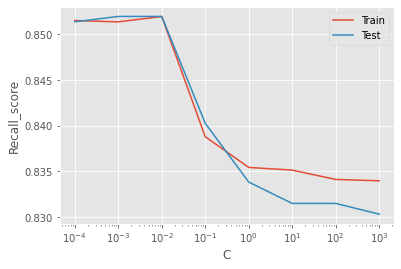

In [ ]:
#plotting R2 score vs alpha value
plt.plot(cv_results2['param_C'], cv_results2['mean_train_score'], label='Train')
plt.plot(cv_results2['param_C'], cv_results2['mean_test_score'], label='Test')
plt.xlabel('C')
plt.ylabel('Recall_score')
plt.xscale('log')
plt.legend()
plt.show()

Hence l2 regularization along with C=0.01 should be our hyperparameters of choice.

In [ ]:
#use class_weight=balanced to give equal weightage
logregmodel = LogisticRegression(C=0.01, penalty='l2', class_weight='balanced')  
logregmodel.fit(X_train_rfe, y_train2)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#flatten the logregmodel.coef_ array
coef_list = []
for i in list(logregmodel.coef_):
    for j in i:
        coef_list.append(j)

In [ ]:
#build dataframe for features and corresponding coefficients
coef_df = pd.DataFrame({'Variable':list(X_train_rfe.columns),
                       'Coefficient':coef_list})

In [ ]:
#displaying the different coefficients, sort by their coefficient values
coef_df.set_index('Variable', inplace=True)
coef_df.sort_values('Coefficient', ascending=True)

,Coefficient
Variable,
loc_ic_mou_8,-1.540346
total_ic_mou_8,-1.446750
total_rech_num_8,-1.346163
diff_total_rech_num_,-1.132376
count_rech_2g_8,-1.129869
monthly_2g_8,-1.083905
av_rech_amt_data_8,-1.018343
diff_total_og_mou_,-1.017901
total_og_mou_8,-1.012169


We decide the importance of different predictors based on the obtained magnitudes of different coefficients after the application of logistic regression on our dataset.

In [ ]:
#get the percentage feature importance based on magnitude of coefficients
coef_df['feature_importance'] = round((coef_df.Coefficient.apply(np.abs) / coef_df.Coefficient.apply(np.abs).sum())*100,1)
coef_df = coef_df.sort_values('feature_importance', ascending=False)
coef_df

,Coefficient,feature_importance
Variable,,
loc_ic_mou_8,-1.540346,11.3
total_ic_mou_8,-1.446750,10.6
total_rech_num_8,-1.346163,9.9
count_rech_2g_8,-1.129869,8.3
diff_total_rech_num_,-1.132376,8.3
monthly_2g_8,-1.083905,7.9
av_rech_amt_data_8,-1.018343,7.5
diff_total_og_mou_,-1.017901,7.5
total_og_mou_8,-1.012169,7.4


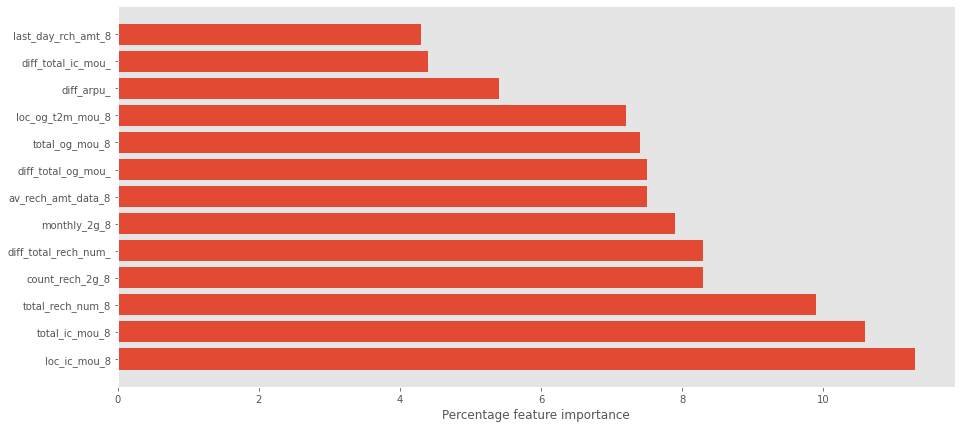

In [ ]:
plt.figure(figsize=(15,7))
plt.barh(y=coef_df.index, width=coef_df.feature_importance)
plt.xlabel('Percentage feature importance')
plt.grid()
plt.show()

From the above, we note that the following top features which are influencing the churn most:

1. `loc_ic_mou_8`: Local incoming minutes of usage during action phase i.e. August month.
2. `total_rech_num_8`:	Total no. of recharge done during action phase i.e. August month.
3. `diff_total_rech_num_`:	Difference in total recharge number between action phase and good phase.
4. `count_rech_2g_8`: Count of 2G data recharge during action phase i.e. August month.		
5. `monthly_2g_8`: Monthly 2G services usage during action phase i.e. August month.
6. `loc_og_t2m_mou_8`: Local outgoing t2m minutes of usage during action phase i.e. August month.	
7. `total_og_mou_8`: Total outgoing minutes of usage during action phase i.e. August month.
8. `av_rech_amt_data_8`: Average amount on data recharges done during action phase i.e. August month. 	
9. `diff_total_og_mou_`: Difference in total outgoing minutes of usage between action phase and good phase.
10. `diff_arpu_`: Difference in average revenue per user between action phase and good phase.

## 8. Final Conclusion

Following strategies are recommended to manage customer churn:
- Free local incoming and outgoing minutes should be offered during the action phase to the customers whom our ML model-I idetify as churners. It incentives the use of voice services of network by those customers and hence reduce churn rate.
- Those customers with low ARPU during the action phase as compared with the good phase may be given additional benefits.
- Those with low monthly 2G data usage during action phase may be given free data with enhanced speed (if it is permissible), to not make them switch to other network.
- Those customers who have not recharged during the month of action phase can be given additional validity of network with free talktimes.
- Those with large difference in MOU between action phase and good phase may be given freebies, as they have high churn rates.